In [11]:
library(splines)
library(stats, pos = 2, lib.loc = NULL)
library(graphics, pos = 3, lib.loc = NULL)
library(ggplot2)
library(reshape2)
library(dplyr)
options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res = 200)

# Test output of the Natural cubic spline (ns) function
- This function generates the B-spline basis matrix for a natural cubic spline.

In [2]:
women

height,weight
<dbl>,<dbl>
58,115
59,117
60,120
61,123
62,126
63,129
64,132
65,135
66,139


In [23]:
ns(women$height, df = 5)

1,2,3,4,5
0.000000e+00,0.000000e+00,0.00000000,0.00000000,0.0000000000
7.592323e-03,0.000000e+00,-0.08670223,0.26010669,-0.1734044626
6.073858e-02,0.000000e+00,-0.15030440,0.45091320,-0.3006088020
2.047498e-01,6.073858e-05,-0.16778345,0.50335034,-0.3355668952
4.334305e-01,1.311953e-02,-0.13244035,0.39732106,-0.2648807067
6.256681e-01,8.084305e-02,-0.07399720,0.22199159,-0.1479943948
6.477162e-01,2.468416e-01,-0.02616007,0.07993794,-0.0532919575
4.791667e-01,4.791667e-01,0.01406302,0.02031093,-0.0135406187
2.468416e-01,6.477162e-01,0.09733619,0.02286023,-0.0152401533
8.084305e-02,6.256681e-01,0.27076826,0.06324188,-0.0405213106


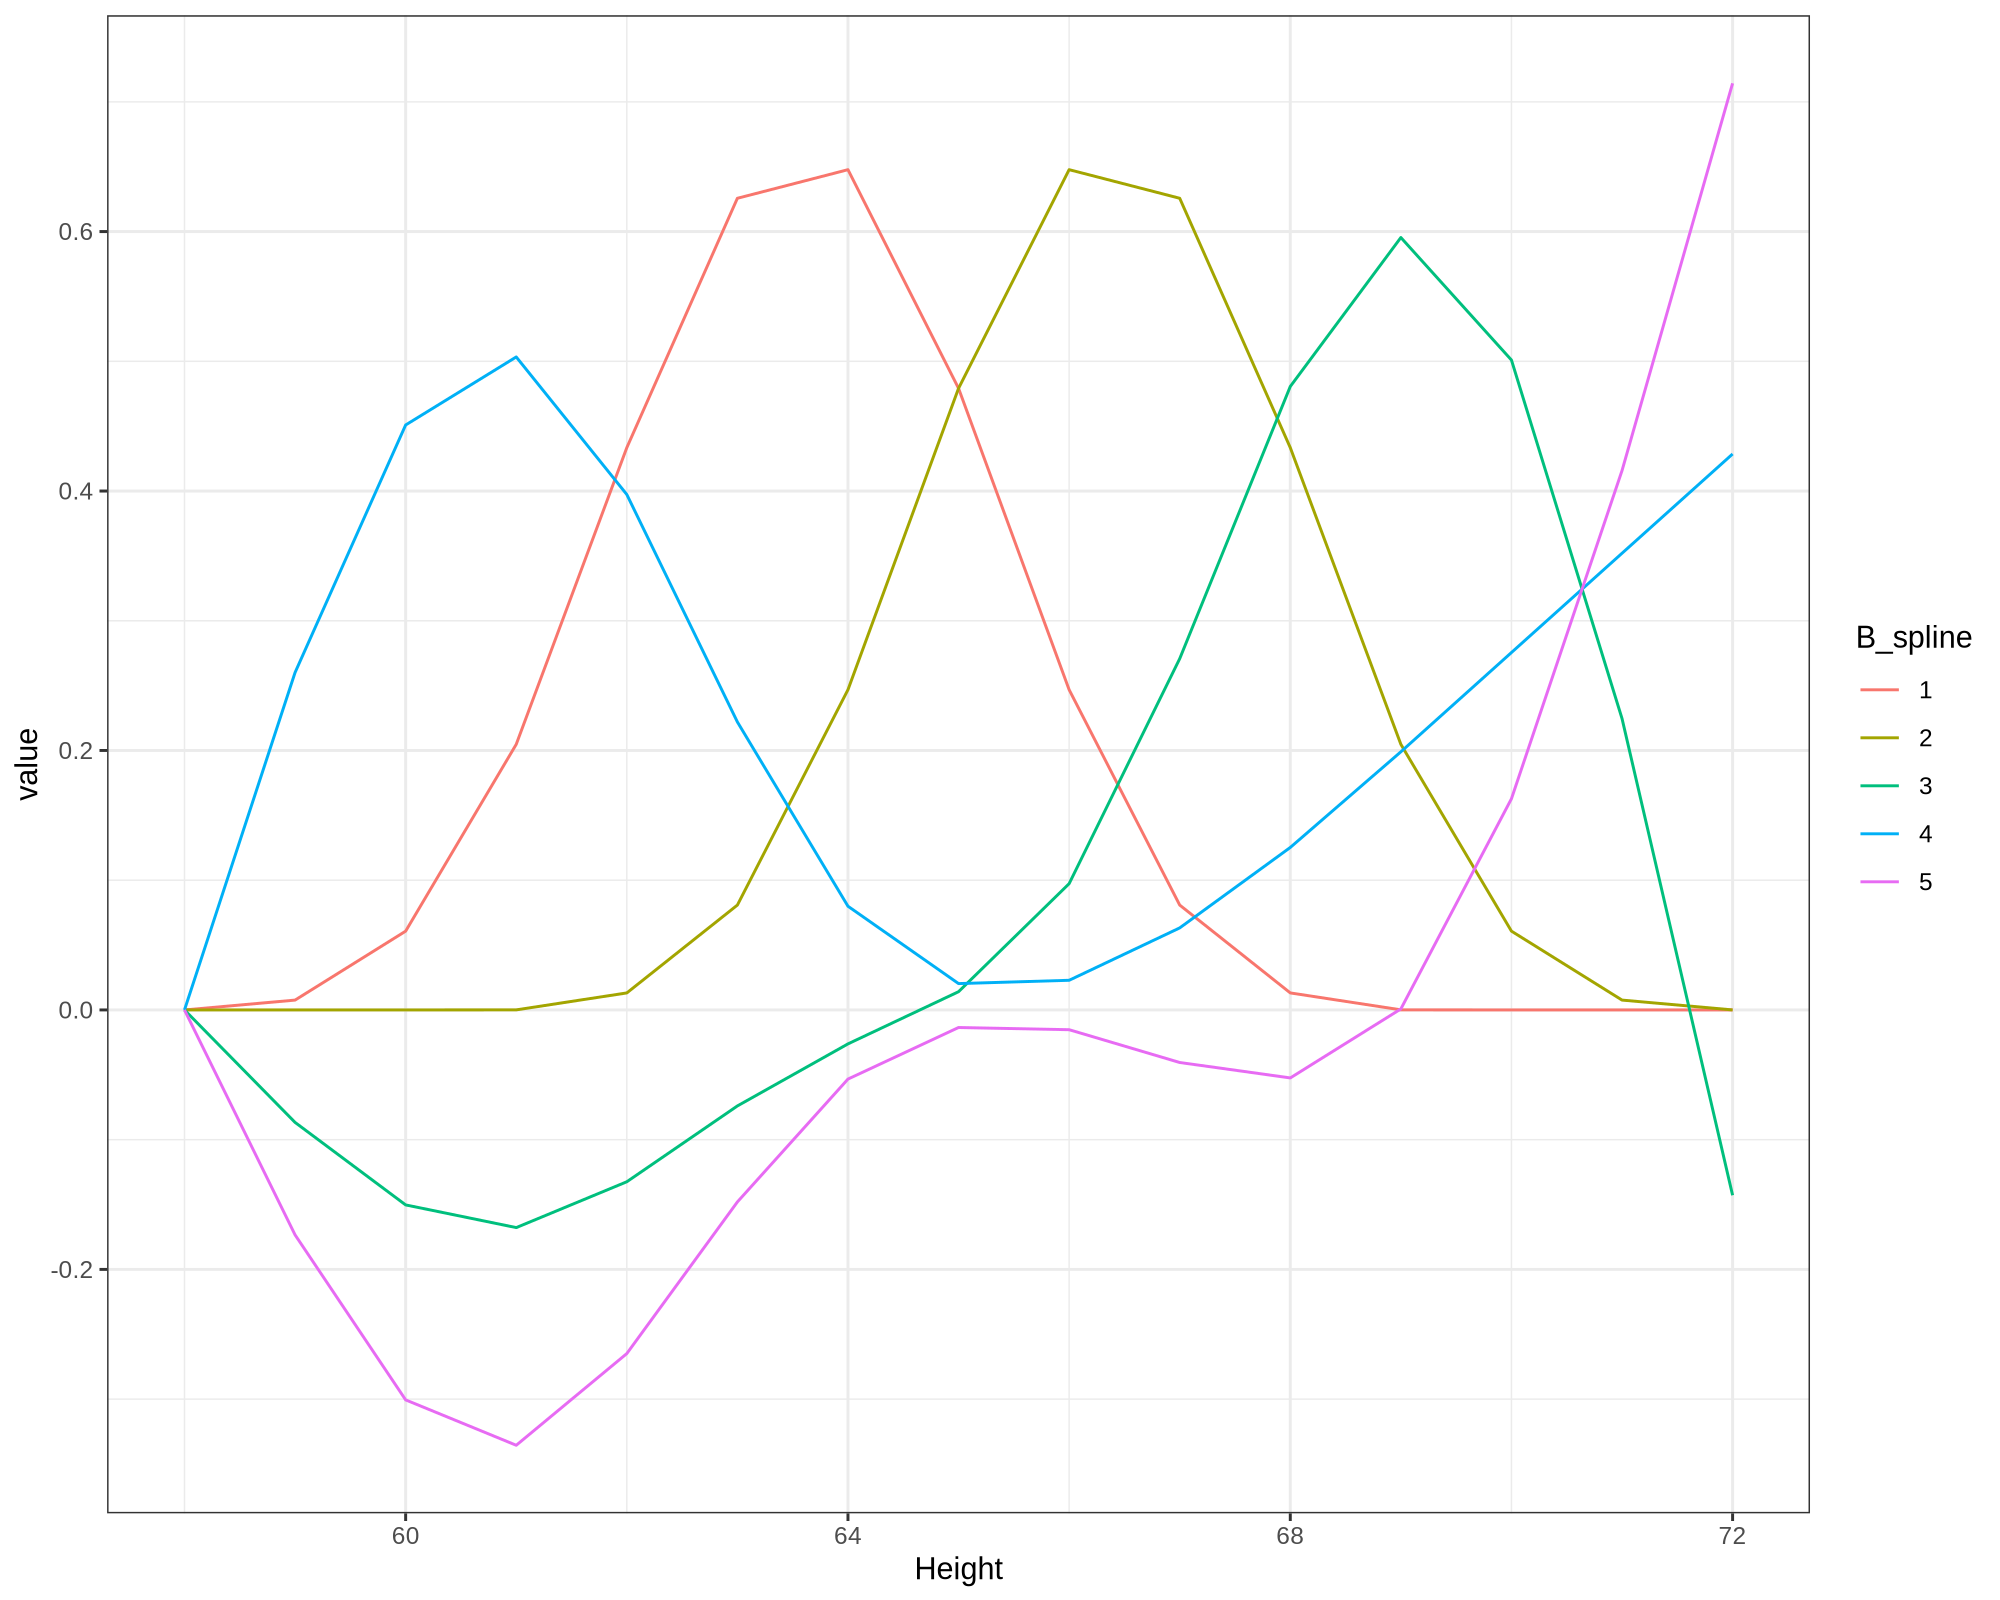

In [12]:
df <- ns(women$height, df = 5) %>% as.data.frame()
df$Height <- women$height

df <- melt(df ,  id.vars = "Height", variable.name = "B_spline")

# plot on same grid, each series colored differently
ggplot(df, aes(Height, value)) + geom_line(aes(colour = B_spline)) + 
theme_bw()

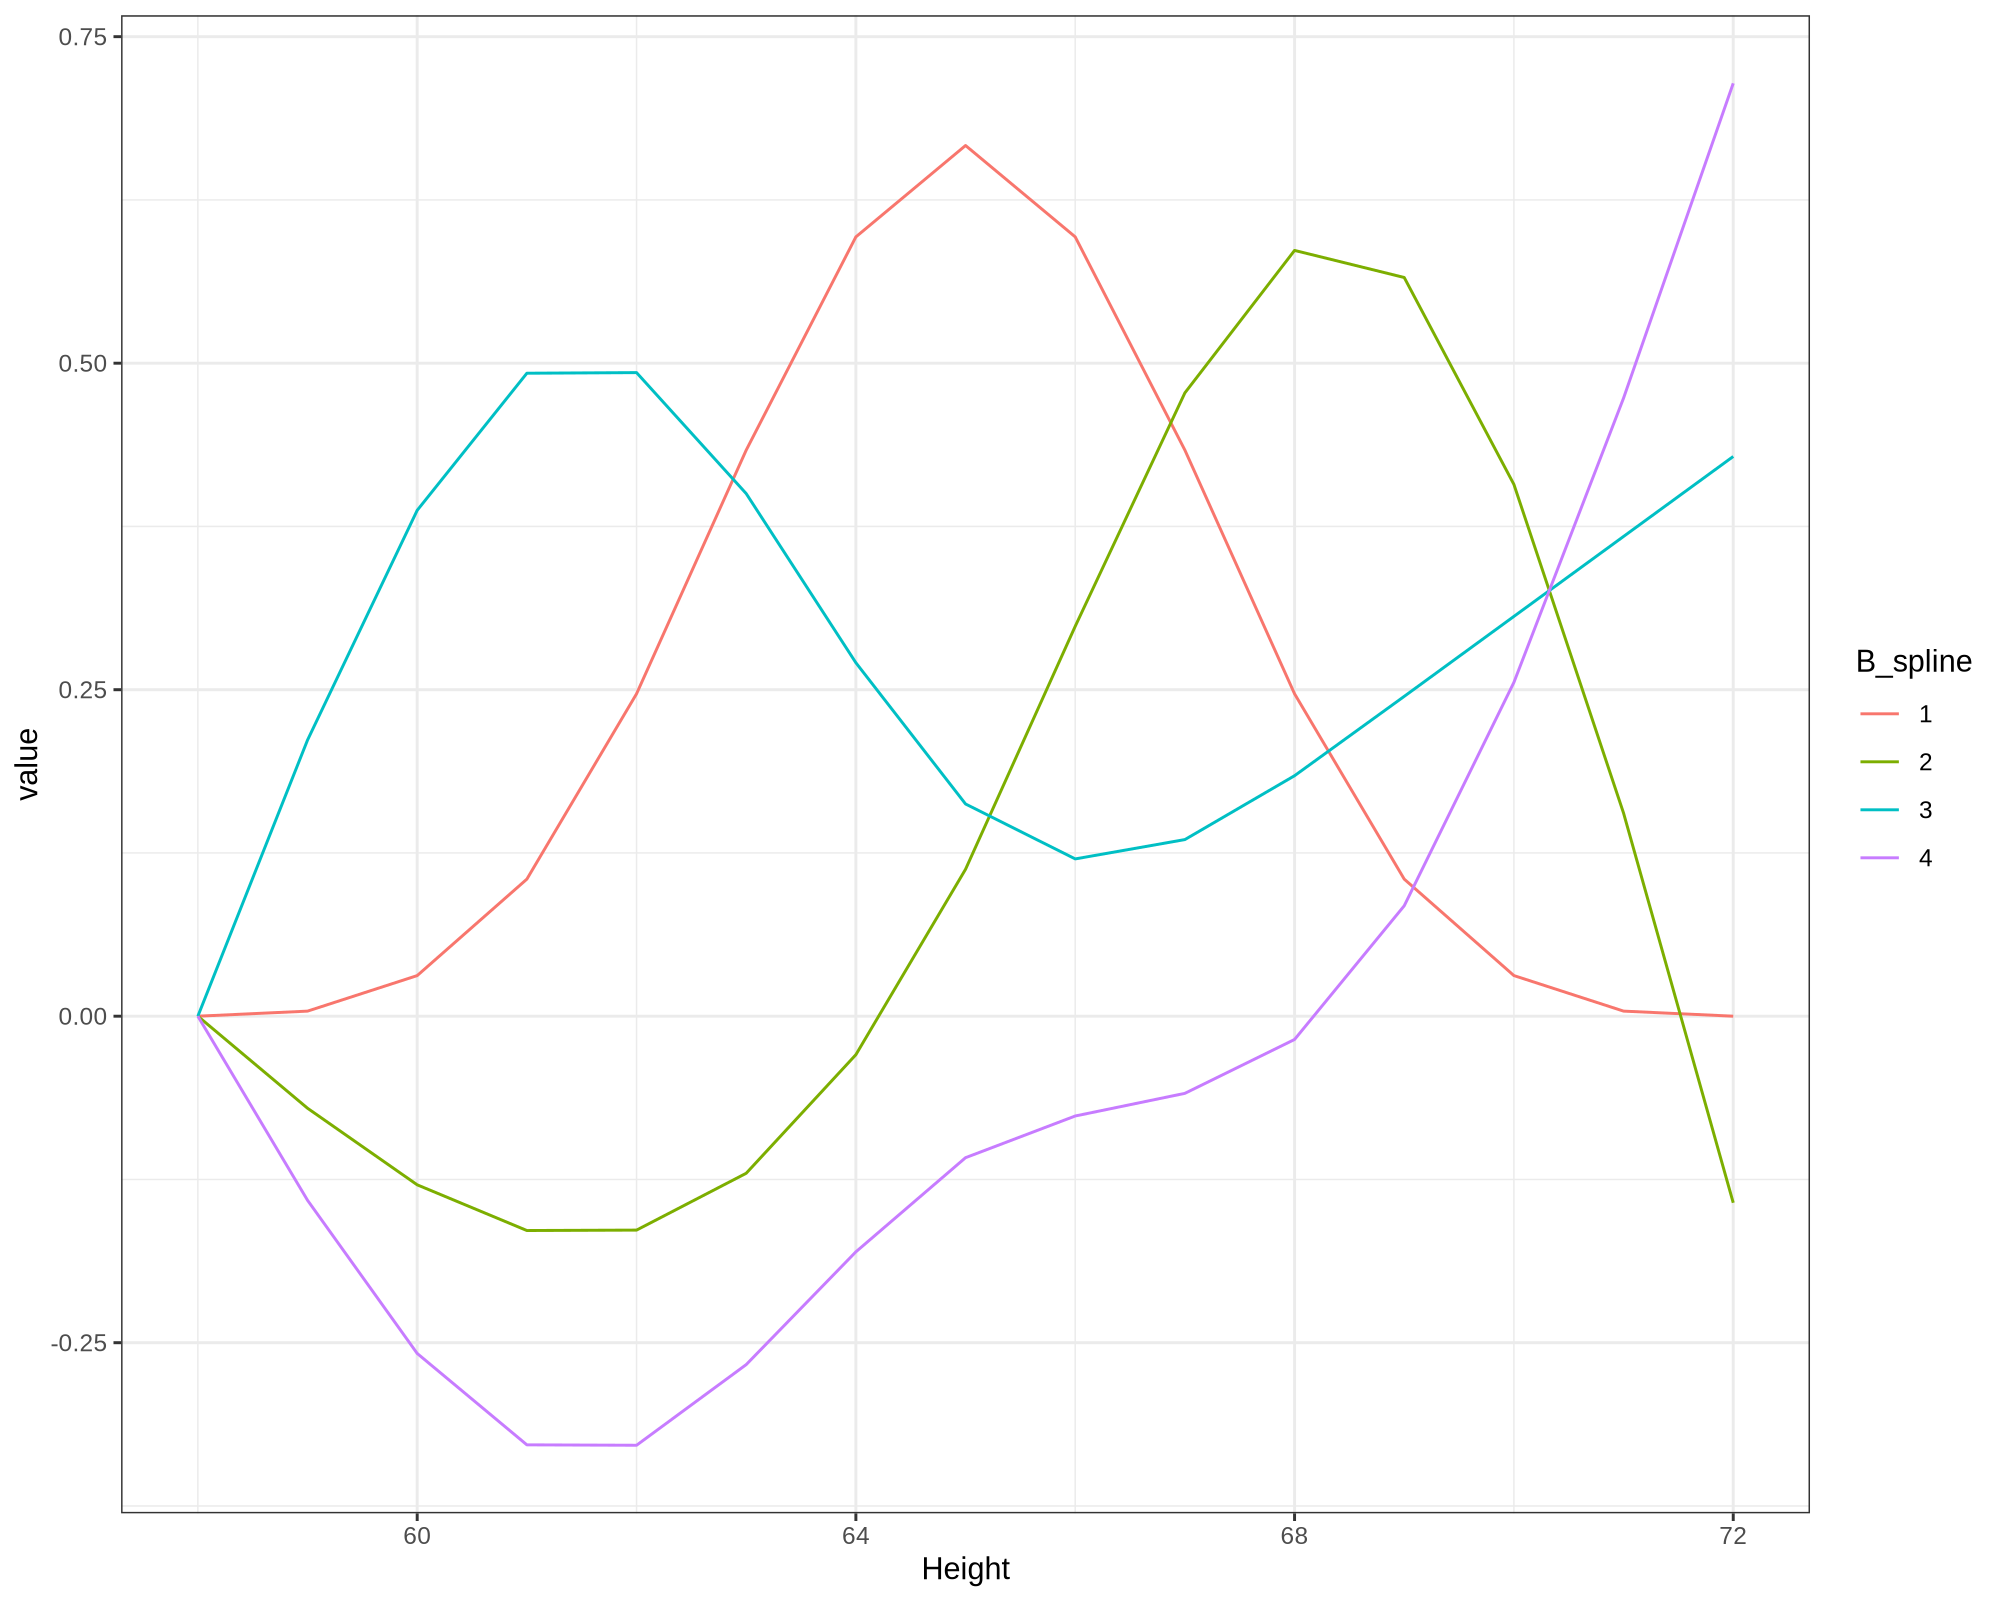

In [13]:
df <- ns(women$height, df = 4) %>% as.data.frame()
df$Height <- women$height

df <- melt(df ,  id.vars = "Height", variable.name = "B_spline")

# plot on same grid, each series colored differently
ggplot(df, aes(Height, value)) + geom_line(aes(colour = B_spline)) +
theme_bw()

In [14]:
ns(women$height, knots = 5)

1,2
0.5518135,-0.62888943
0.5441849,-0.53336206
0.5365563,-0.43783469
0.5289277,-0.34230733
0.5212991,-0.24677996
0.5136705,-0.15125259
0.5060419,-0.05572522
0.4984133,0.03980214
0.4907847,0.13532951
0.4831561,0.23085688


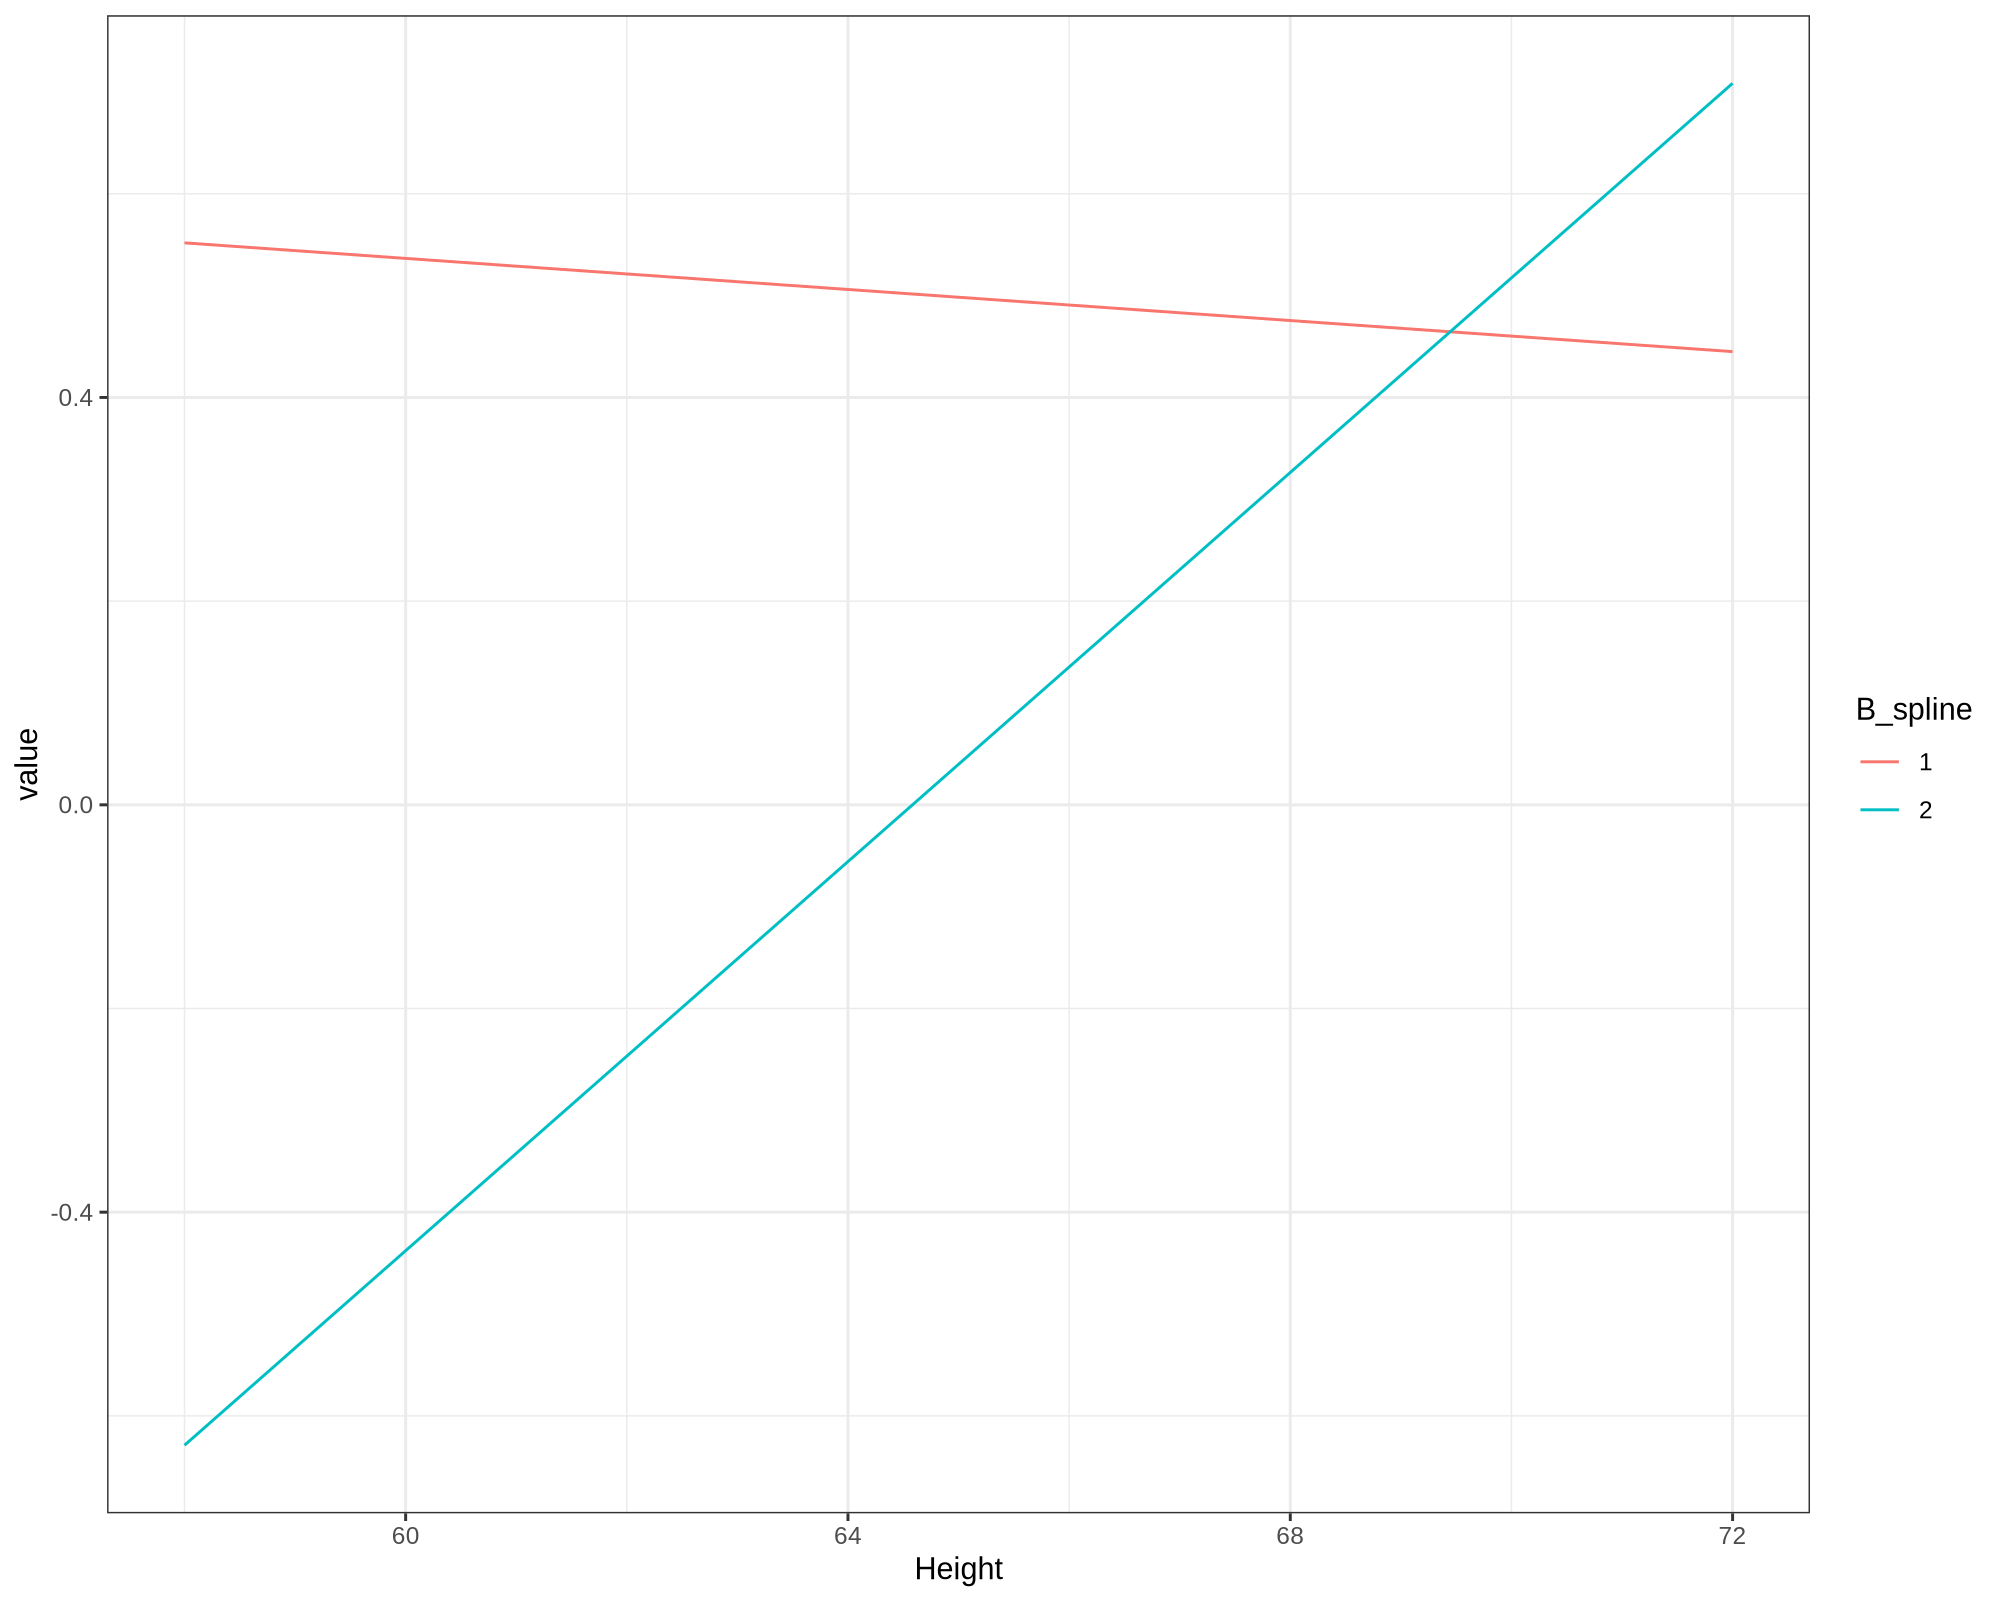

In [15]:
df <- ns(women$height, knots = 5) %>% as.data.frame()
df$Height <- women$height

df <- melt(df ,  id.vars = "Height", variable.name = "B_spline")

# plot on same grid, each series colored differently
ggplot(df, aes(Height, value)) + geom_line(aes(colour = B_spline)) + 
theme_bw()

In [16]:
summary(fm1 <- lm(weight ~ ns(height, df = 5), data = women))


Call:
lm(formula = weight ~ ns(height, df = 5), data = women)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38333 -0.12585  0.07083  0.15401  0.30426 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         114.7447     0.2338  490.88  < 2e-16 ***
ns(height, df = 5)1  15.9474     0.3699   43.12 9.69e-12 ***
ns(height, df = 5)2  25.1695     0.4323   58.23 6.55e-13 ***
ns(height, df = 5)3  33.2582     0.3541   93.93 8.91e-15 ***
ns(height, df = 5)4  50.7894     0.6062   83.78 2.49e-14 ***
ns(height, df = 5)5  45.0363     0.2784  161.75  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2645 on 9 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9997 
F-statistic:  9609 on 5 and 9 DF,  p-value: < 2.2e-16


In [17]:
attr(terms(fm1), "predvars")

list(weight, ns(height, knots = c(60.8, 63.6, 66.4, 69.2), Boundary.knots = c(58, 
72), intercept = FALSE))

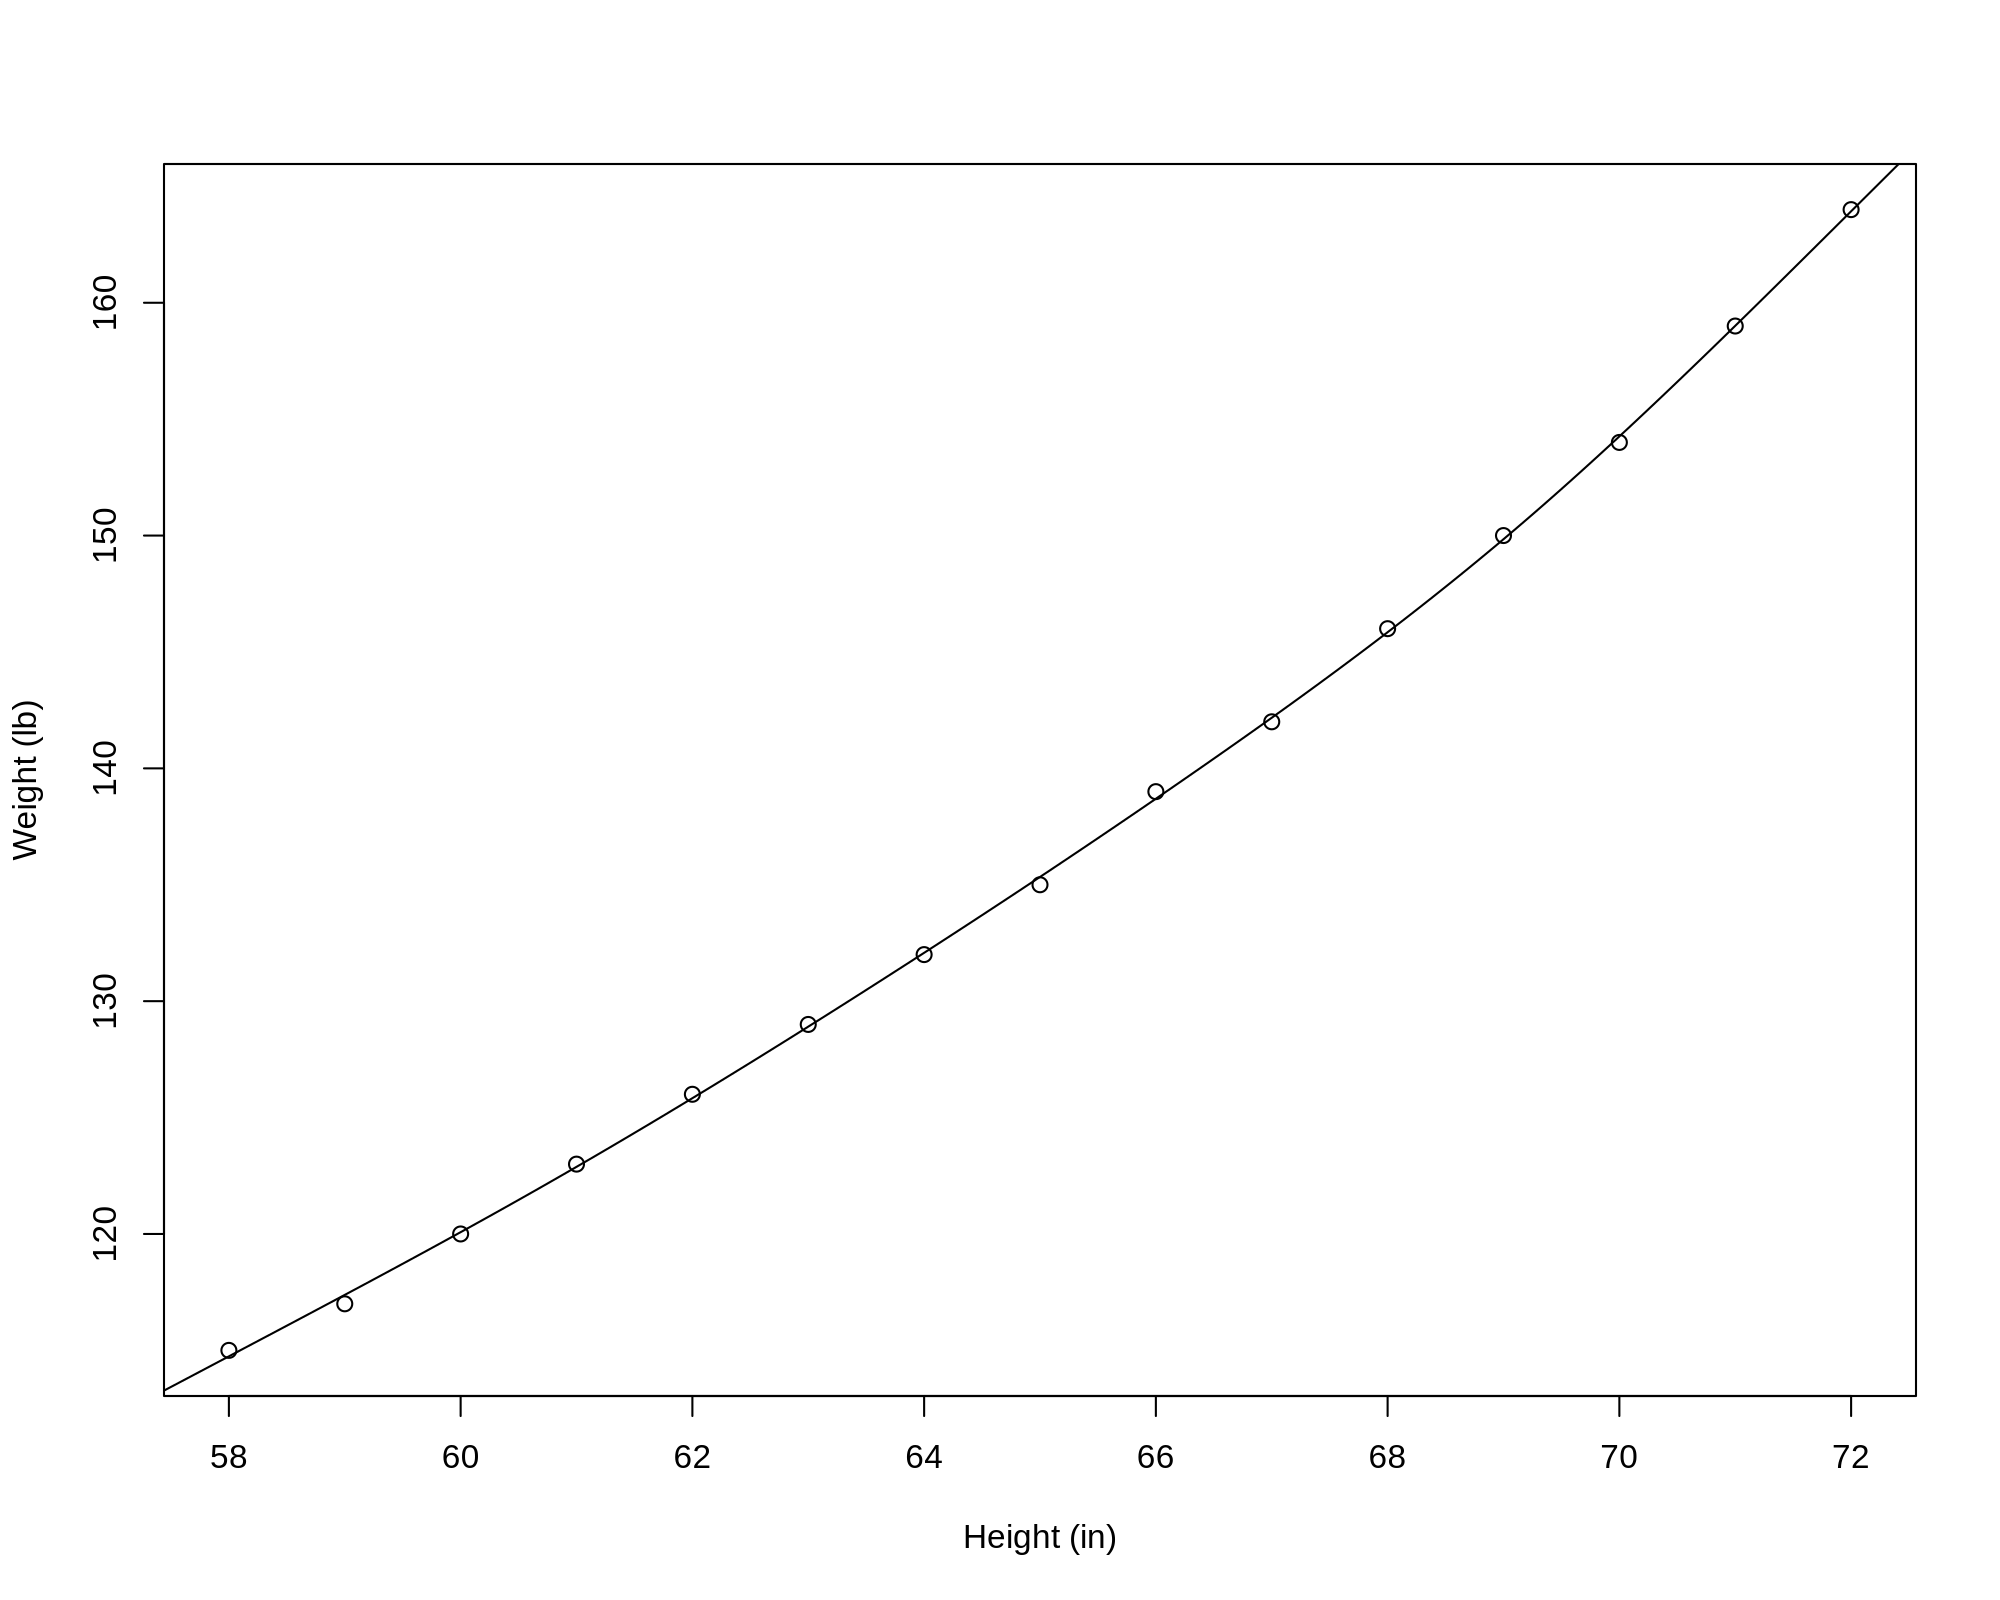

In [18]:
plot(women, xlab = "Height (in)", ylab = "Weight (lb)")

ht <- seq(57, 73, length.out = 200)
nD <- data.frame(height = ht)

lines(ht, p1 <- predict(fm1, nD))

In [22]:
stopifnot(all.equal(p1, predict(update(fm1, . ~ splines::ns(height, df=5)), nD)))

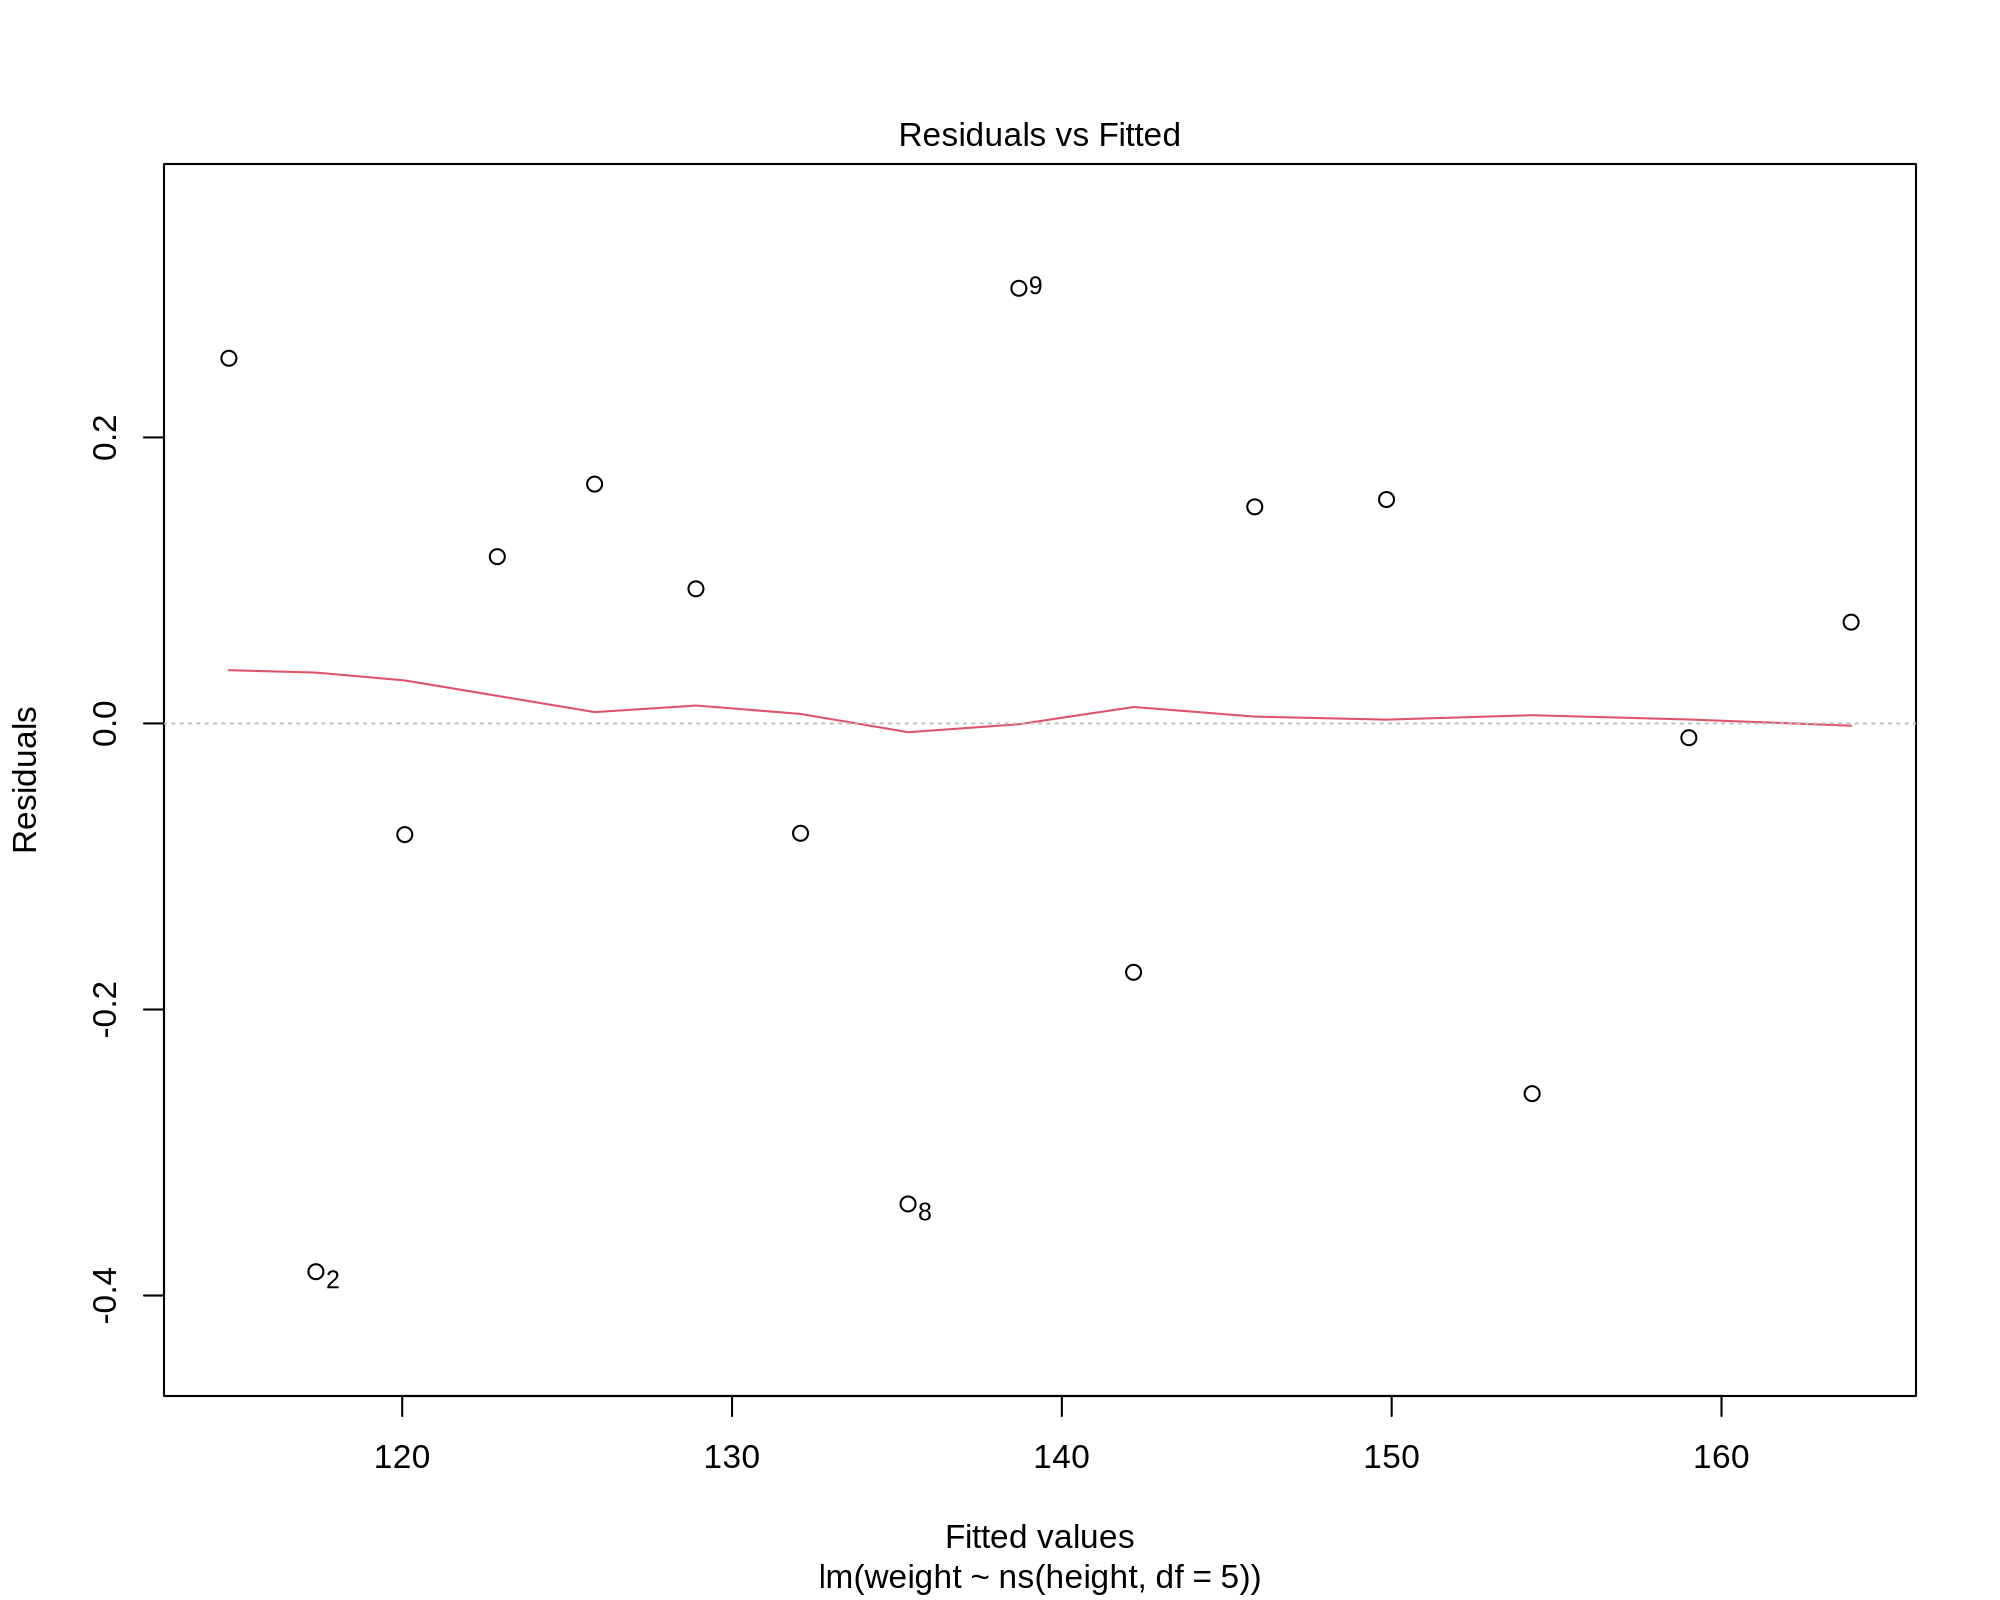

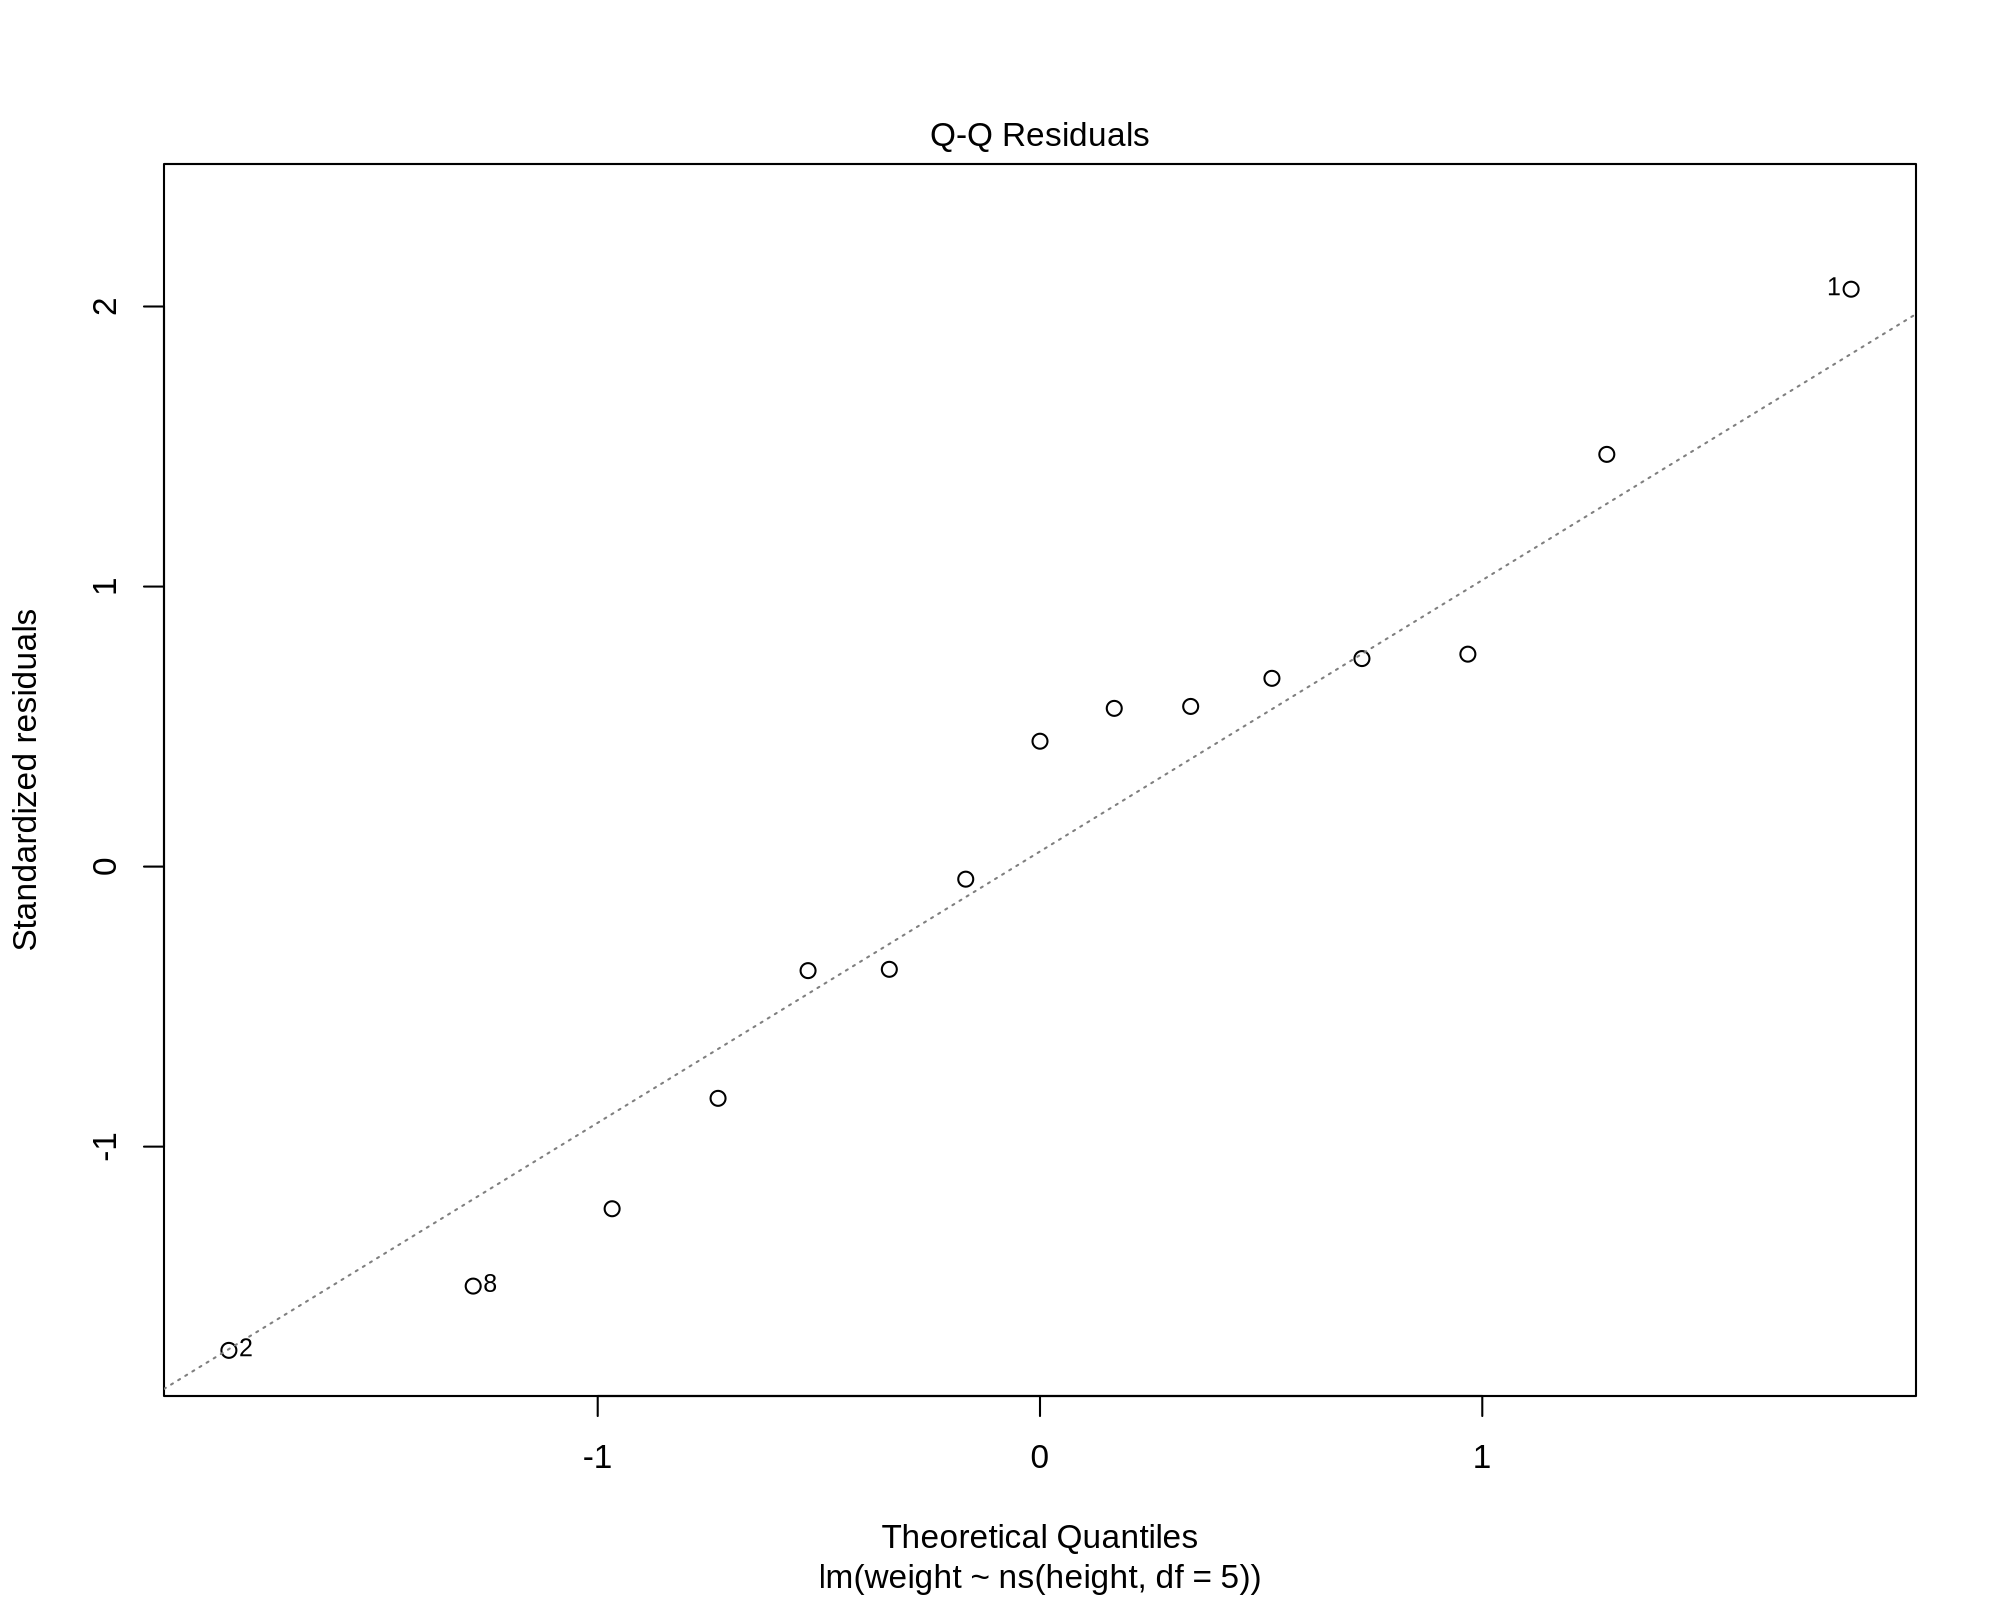

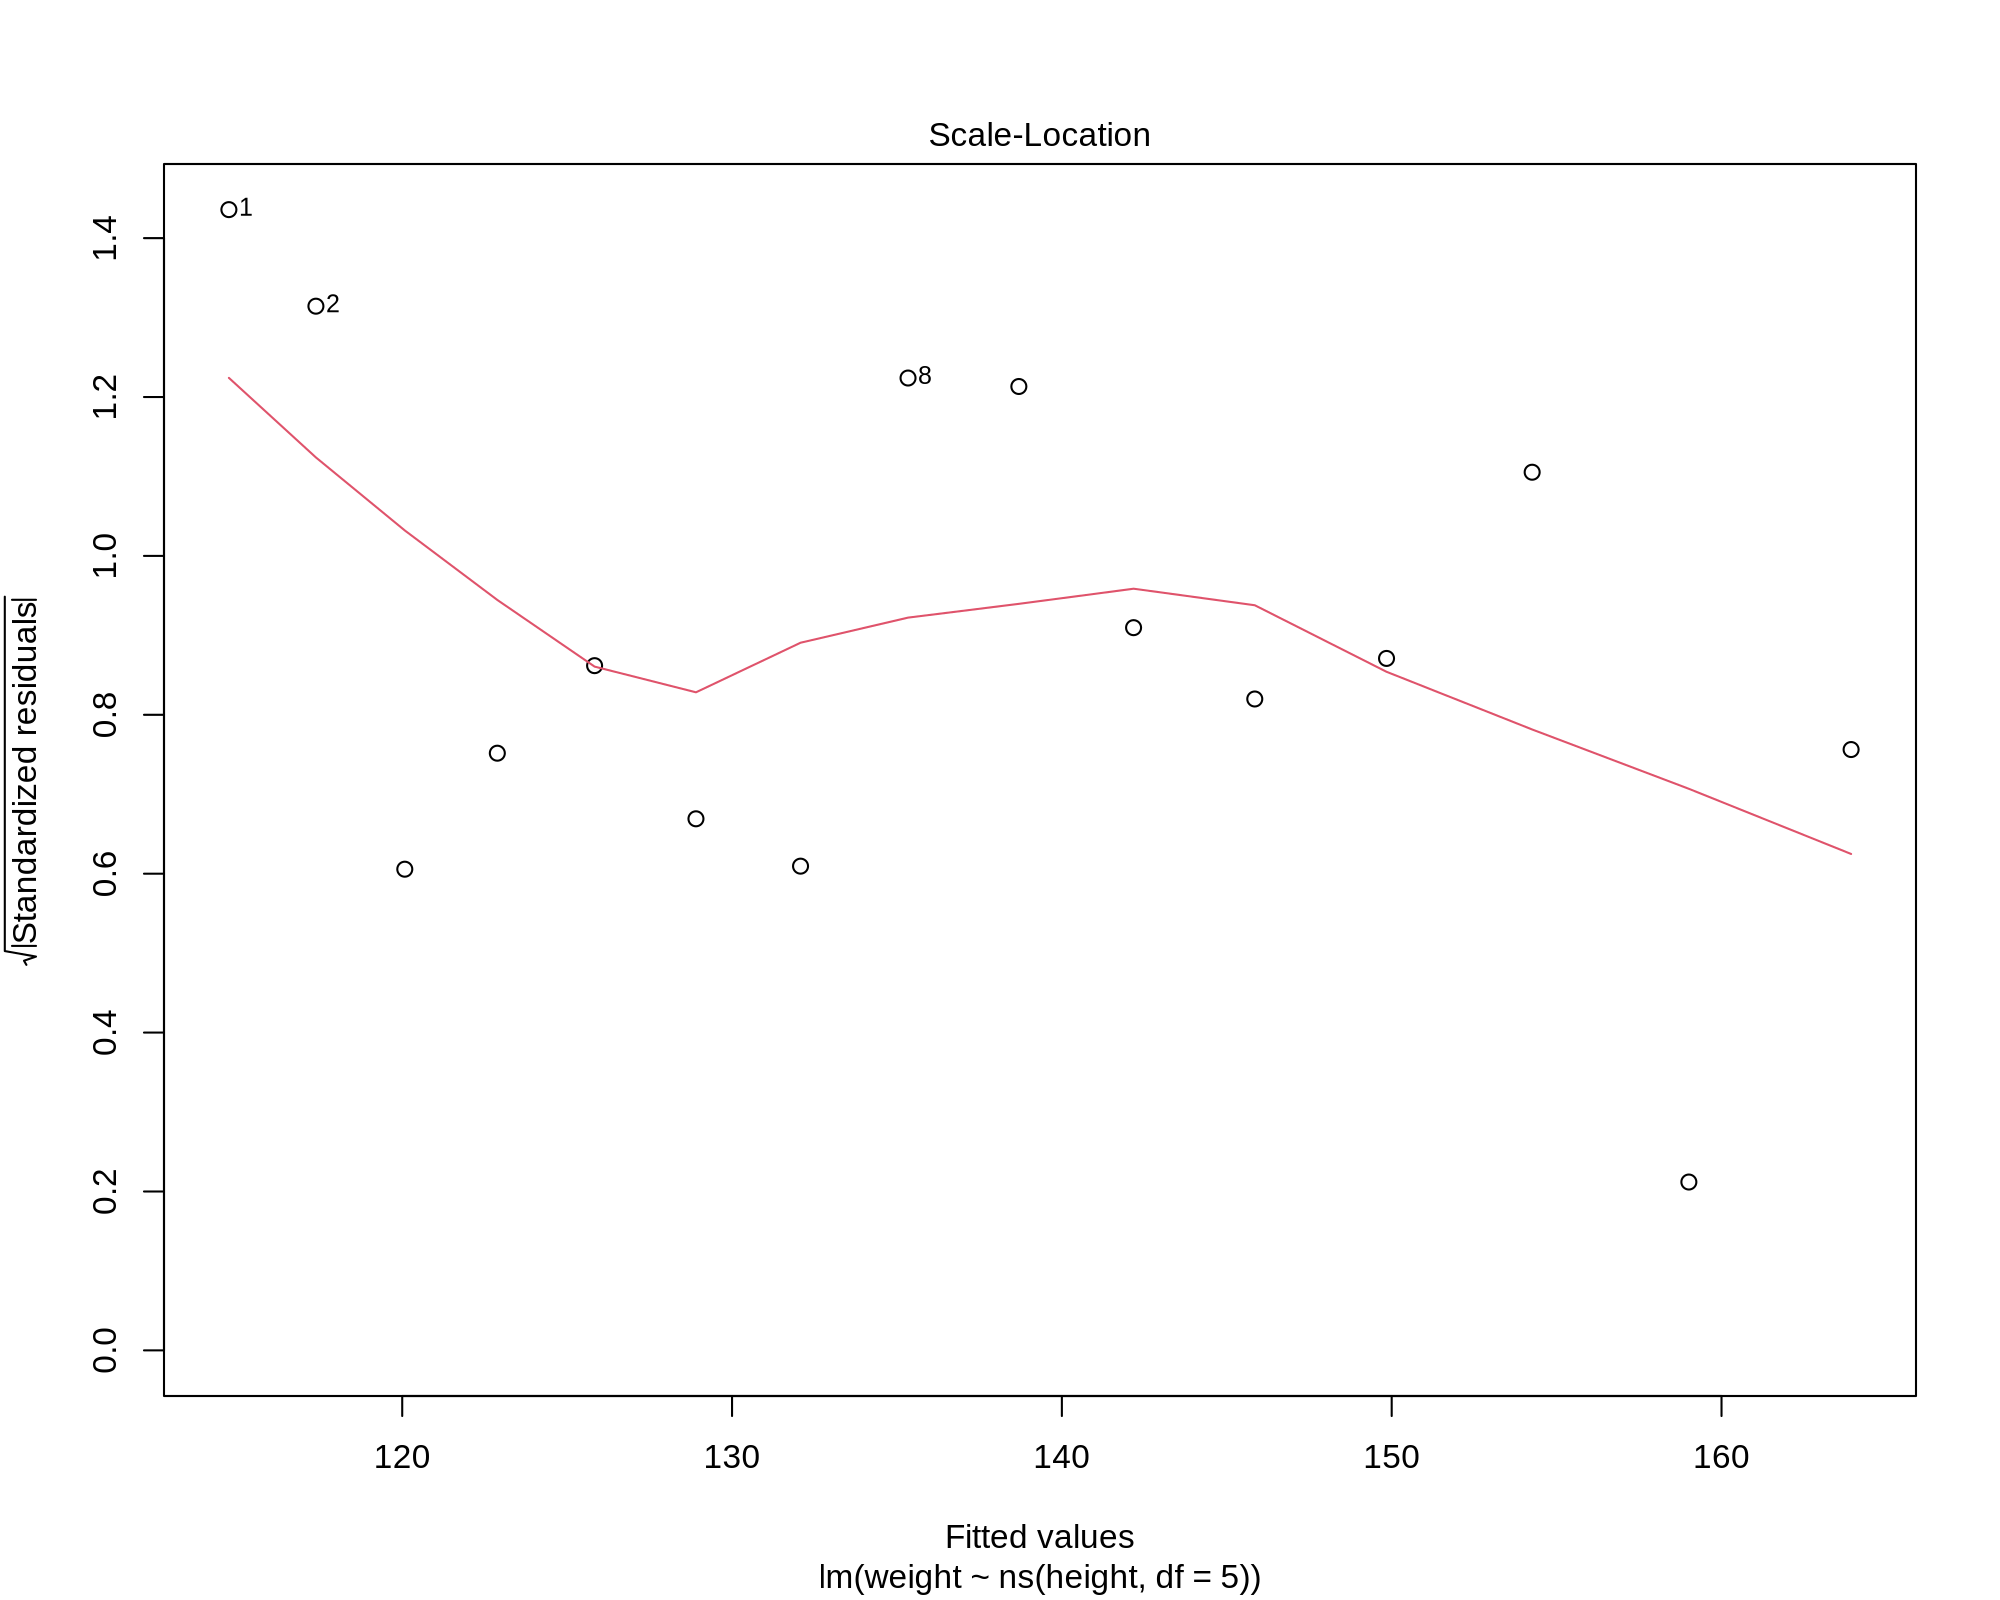

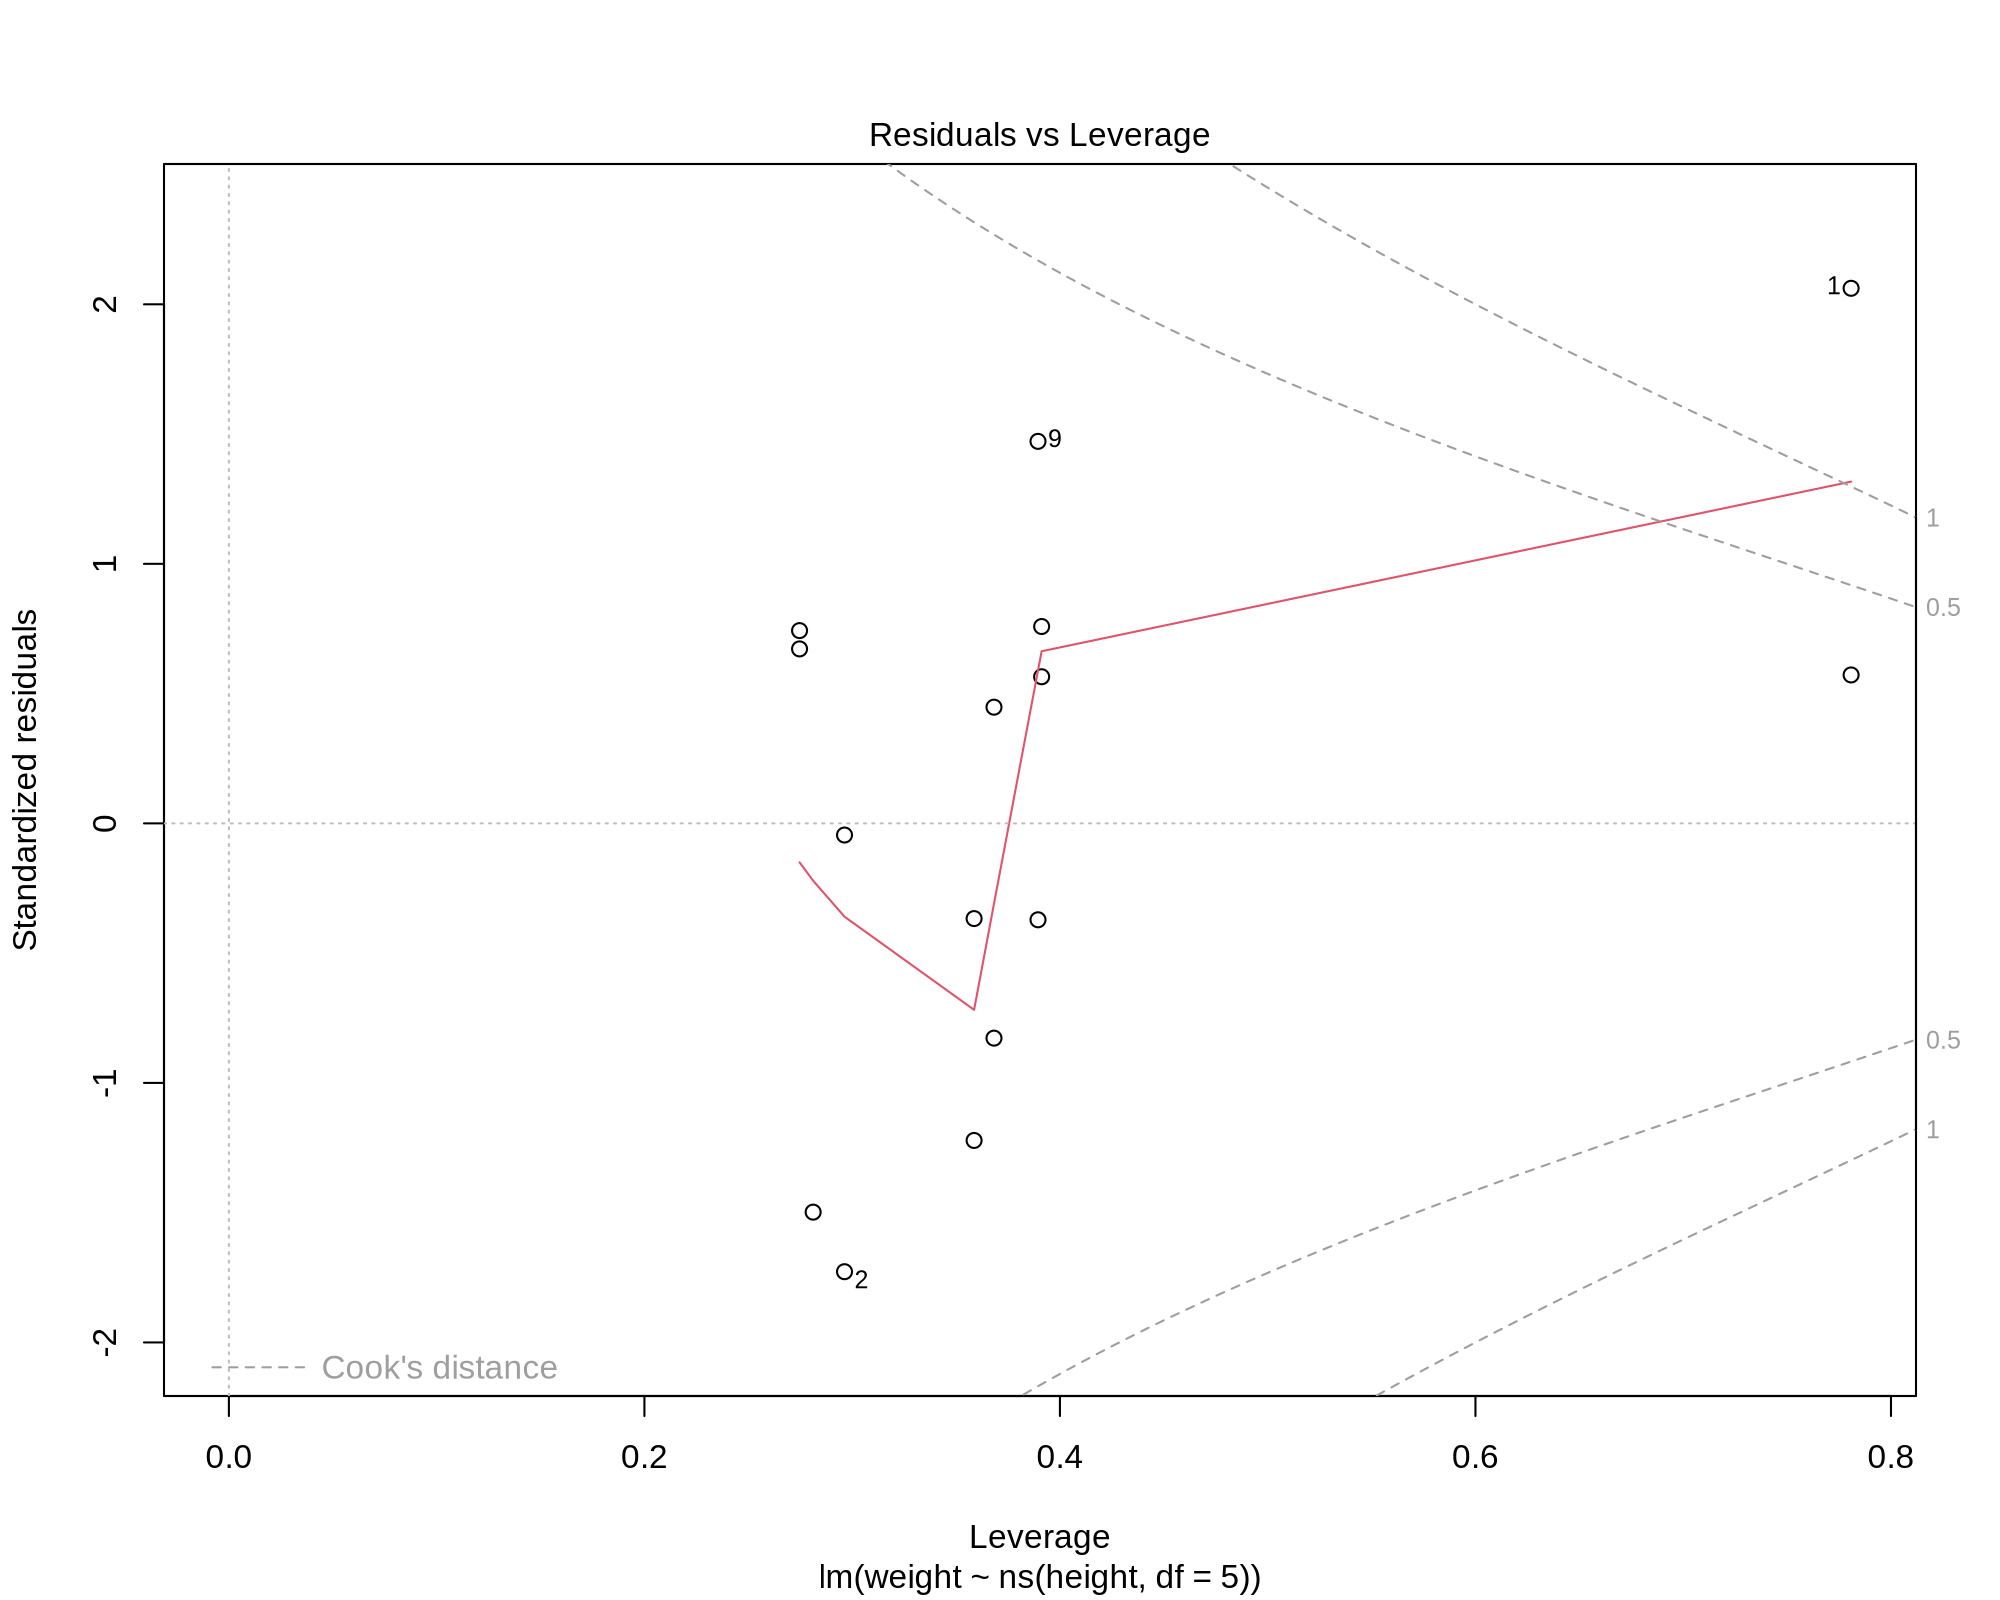

In [21]:
plot(fm1)

# Test output of the BS spline (bs) function
- This function generates the B-spline basis matrix for a polynomial spline.

In [24]:
bs(women$height, df = 5)

1,2,3,4,5
0.000000e+00,0.000000000,0.000000000,0.000000e+00,0.000000000
4.534439e-01,0.059857872,0.001639942,0.000000e+00,0.000000000
5.969388e-01,0.203352770,0.013119534,0.000000e+00,0.000000000
5.338010e-01,0.376366618,0.044278426,0.000000e+00,0.000000000
3.673469e-01,0.524781341,0.104956268,0.000000e+00,0.000000000
2.001640e-01,0.595025510,0.204719388,9.110787e-05,0.000000000
9.110787e-02,0.566326531,0.336734694,5.830904e-03,0.000000000
3.125000e-02,0.468750000,0.468750000,3.125000e-02,0.000000000
5.830904e-03,0.336734694,0.566326531,9.110787e-02,0.000000000
9.110787e-05,0.204719388,0.595025510,2.001640e-01,0.000000000


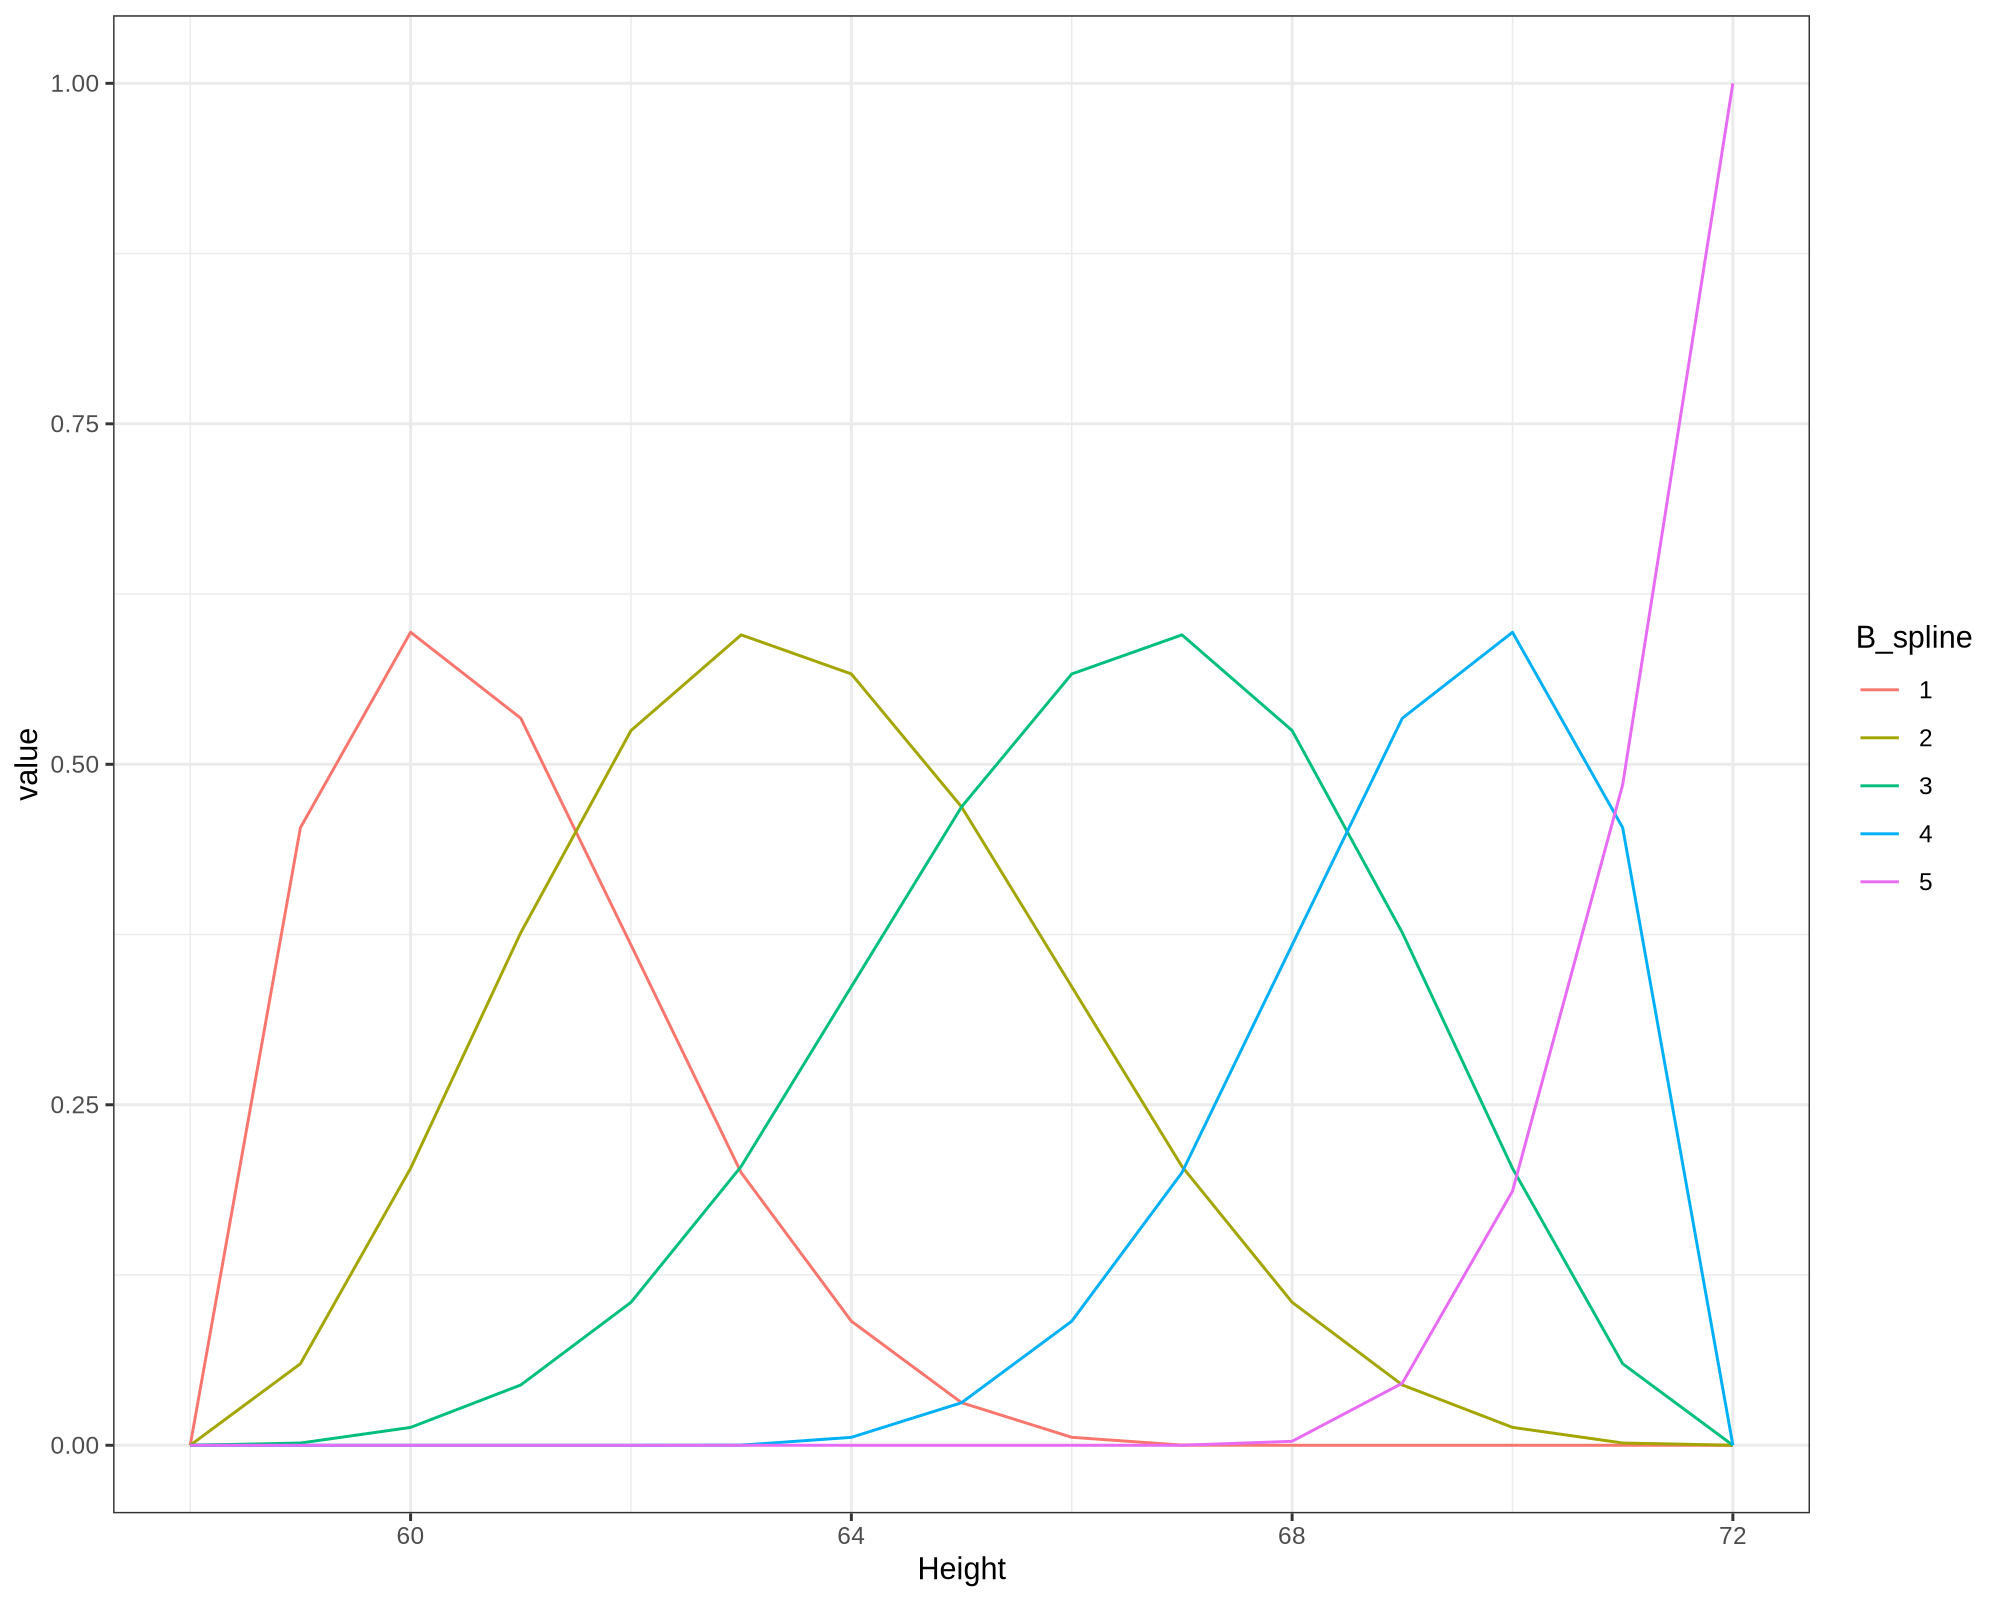

In [26]:
df <- bs(women$height, df = 5) %>% as.data.frame()
df$Height <- women$height

df <- melt(df ,  id.vars = "Height", variable.name = "B_spline")

# plot on same grid, each series colored differently
ggplot(df, aes(Height, value)) + geom_line(aes(colour = B_spline)) + 
theme_bw()

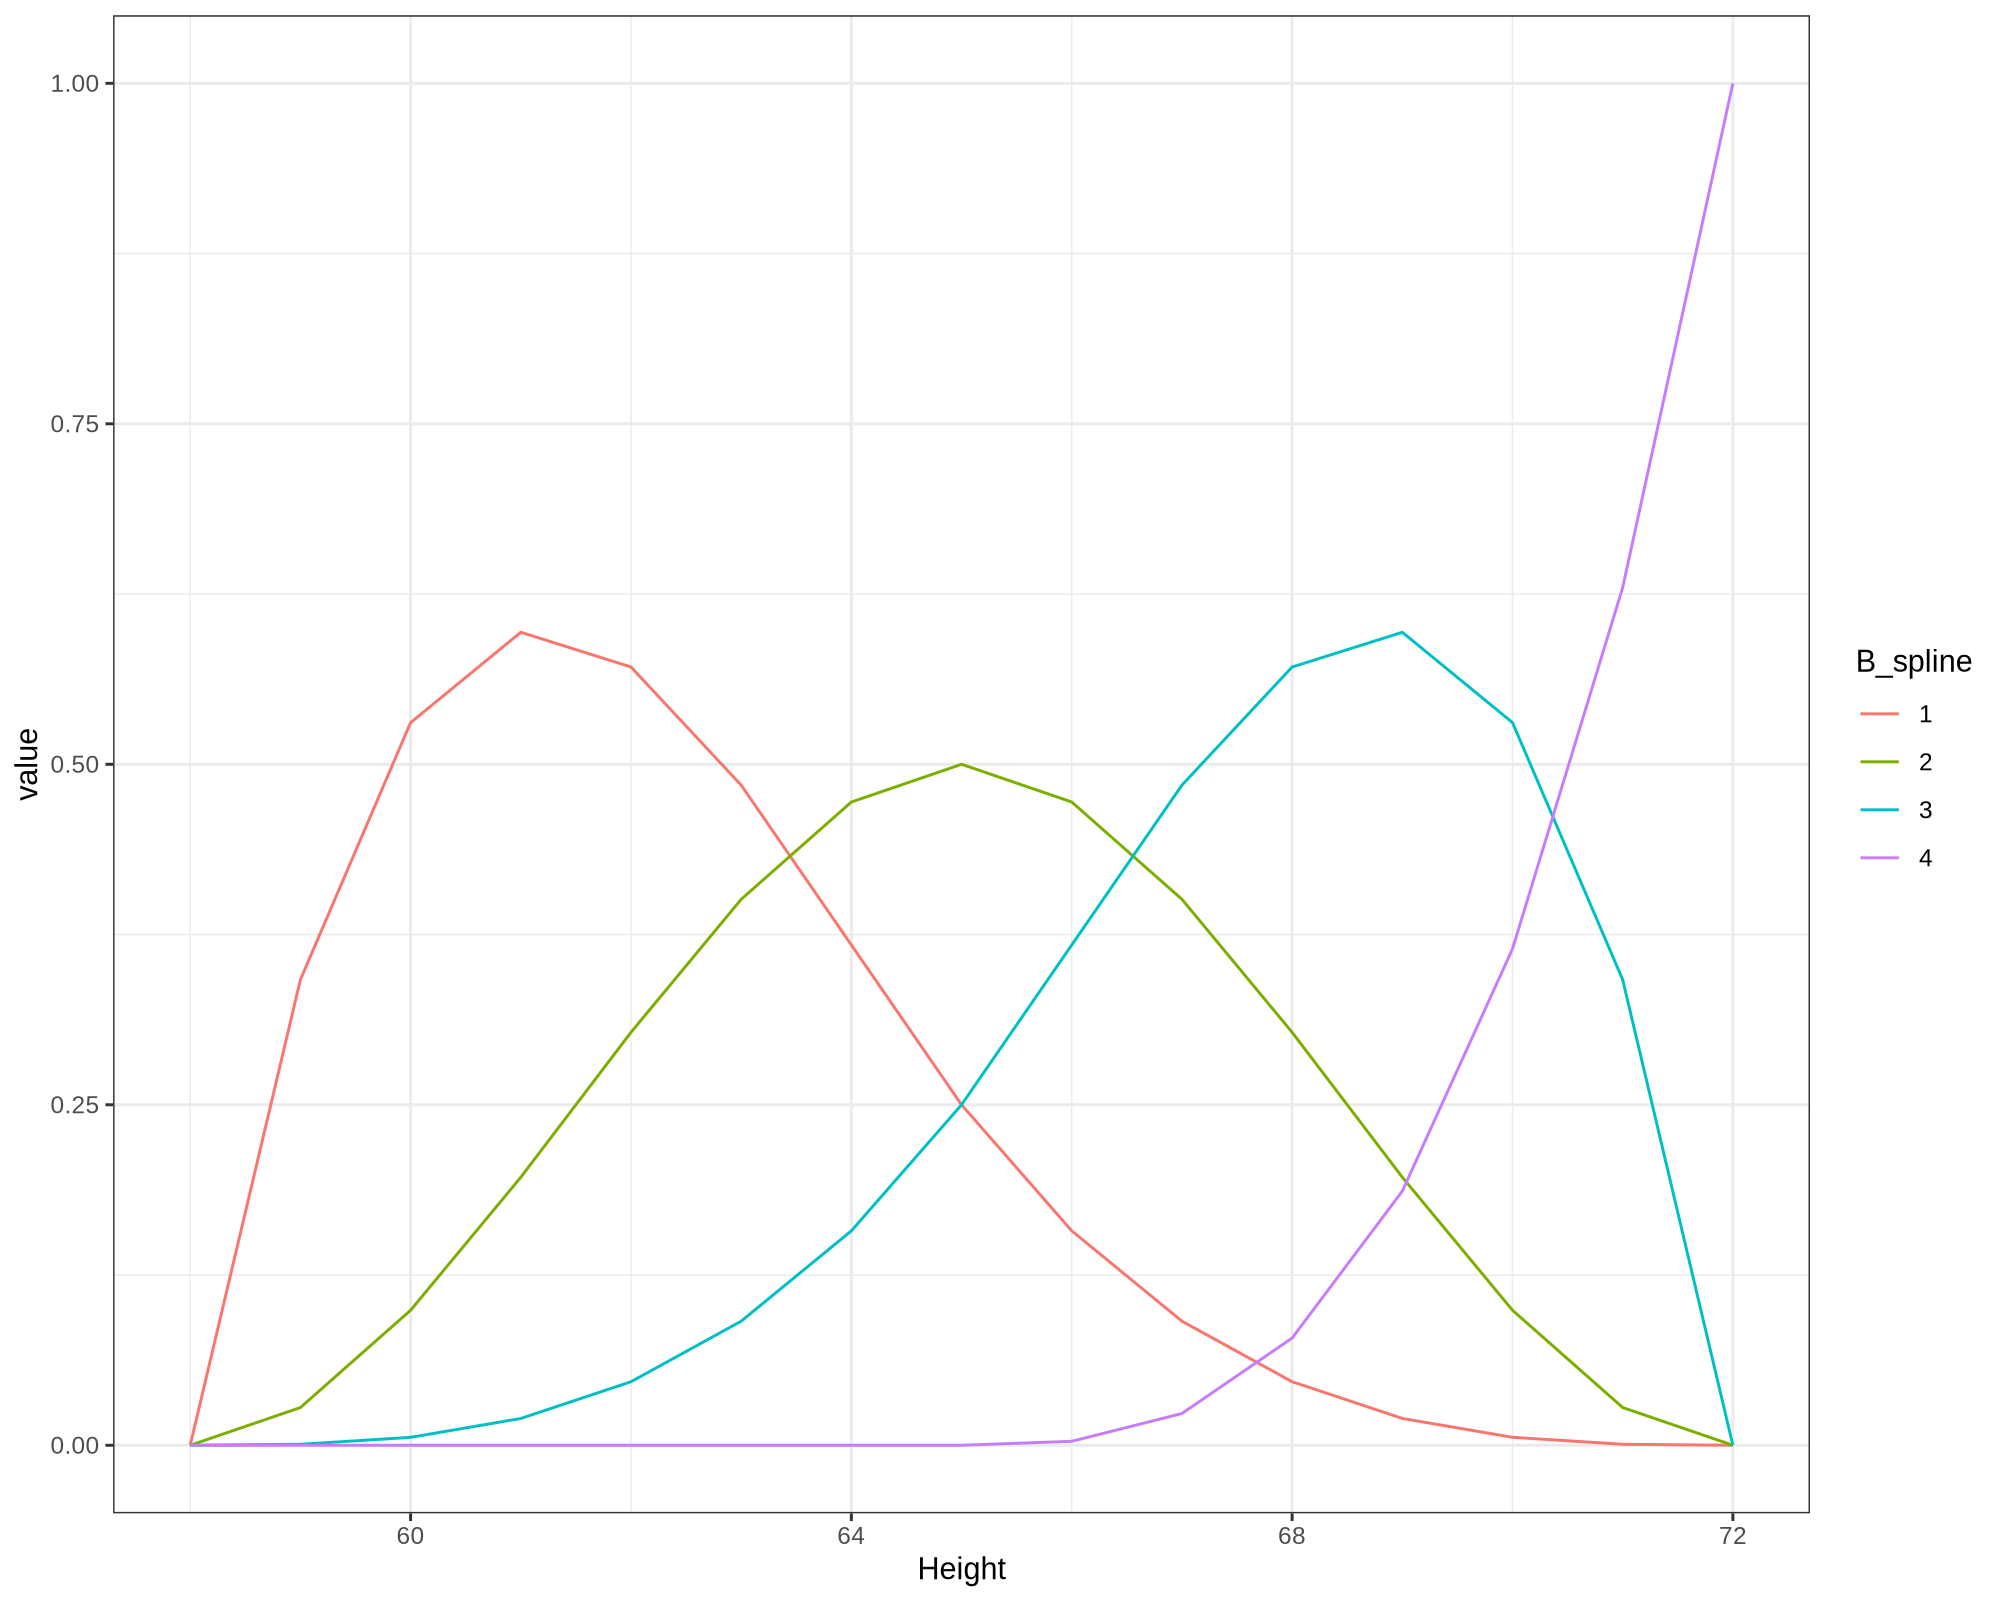

In [27]:
df <- bs(women$height, df = 4) %>% as.data.frame()
df$Height <- women$height

df <- melt(df ,  id.vars = "Height", variable.name = "B_spline")

# plot on same grid, each series colored differently
ggplot(df, aes(Height, value)) + geom_line(aes(colour = B_spline)) +
theme_bw()

In [28]:
bs(women$height, knots = 5)

1,2,3,4
1.0000000000,0.00000000,0.00000000,0.0000000000
0.8006559767,0.18476676,0.01421283,0.0003644315
0.6297376093,0.31486880,0.05247813,0.0029154519
0.4850583090,0.39686589,0.10823615,0.0098396501
0.3644314869,0.43731778,0.17492711,0.0233236152
0.2656705539,0.44278426,0.24599125,0.0455539359
0.1865889213,0.41982507,0.31486880,0.0787172012
0.1250000000,0.37500000,0.37500000,0.1250000000
0.0787172012,0.31486880,0.41982507,0.1865889213
0.0455539359,0.24599125,0.44278426,0.2656705539


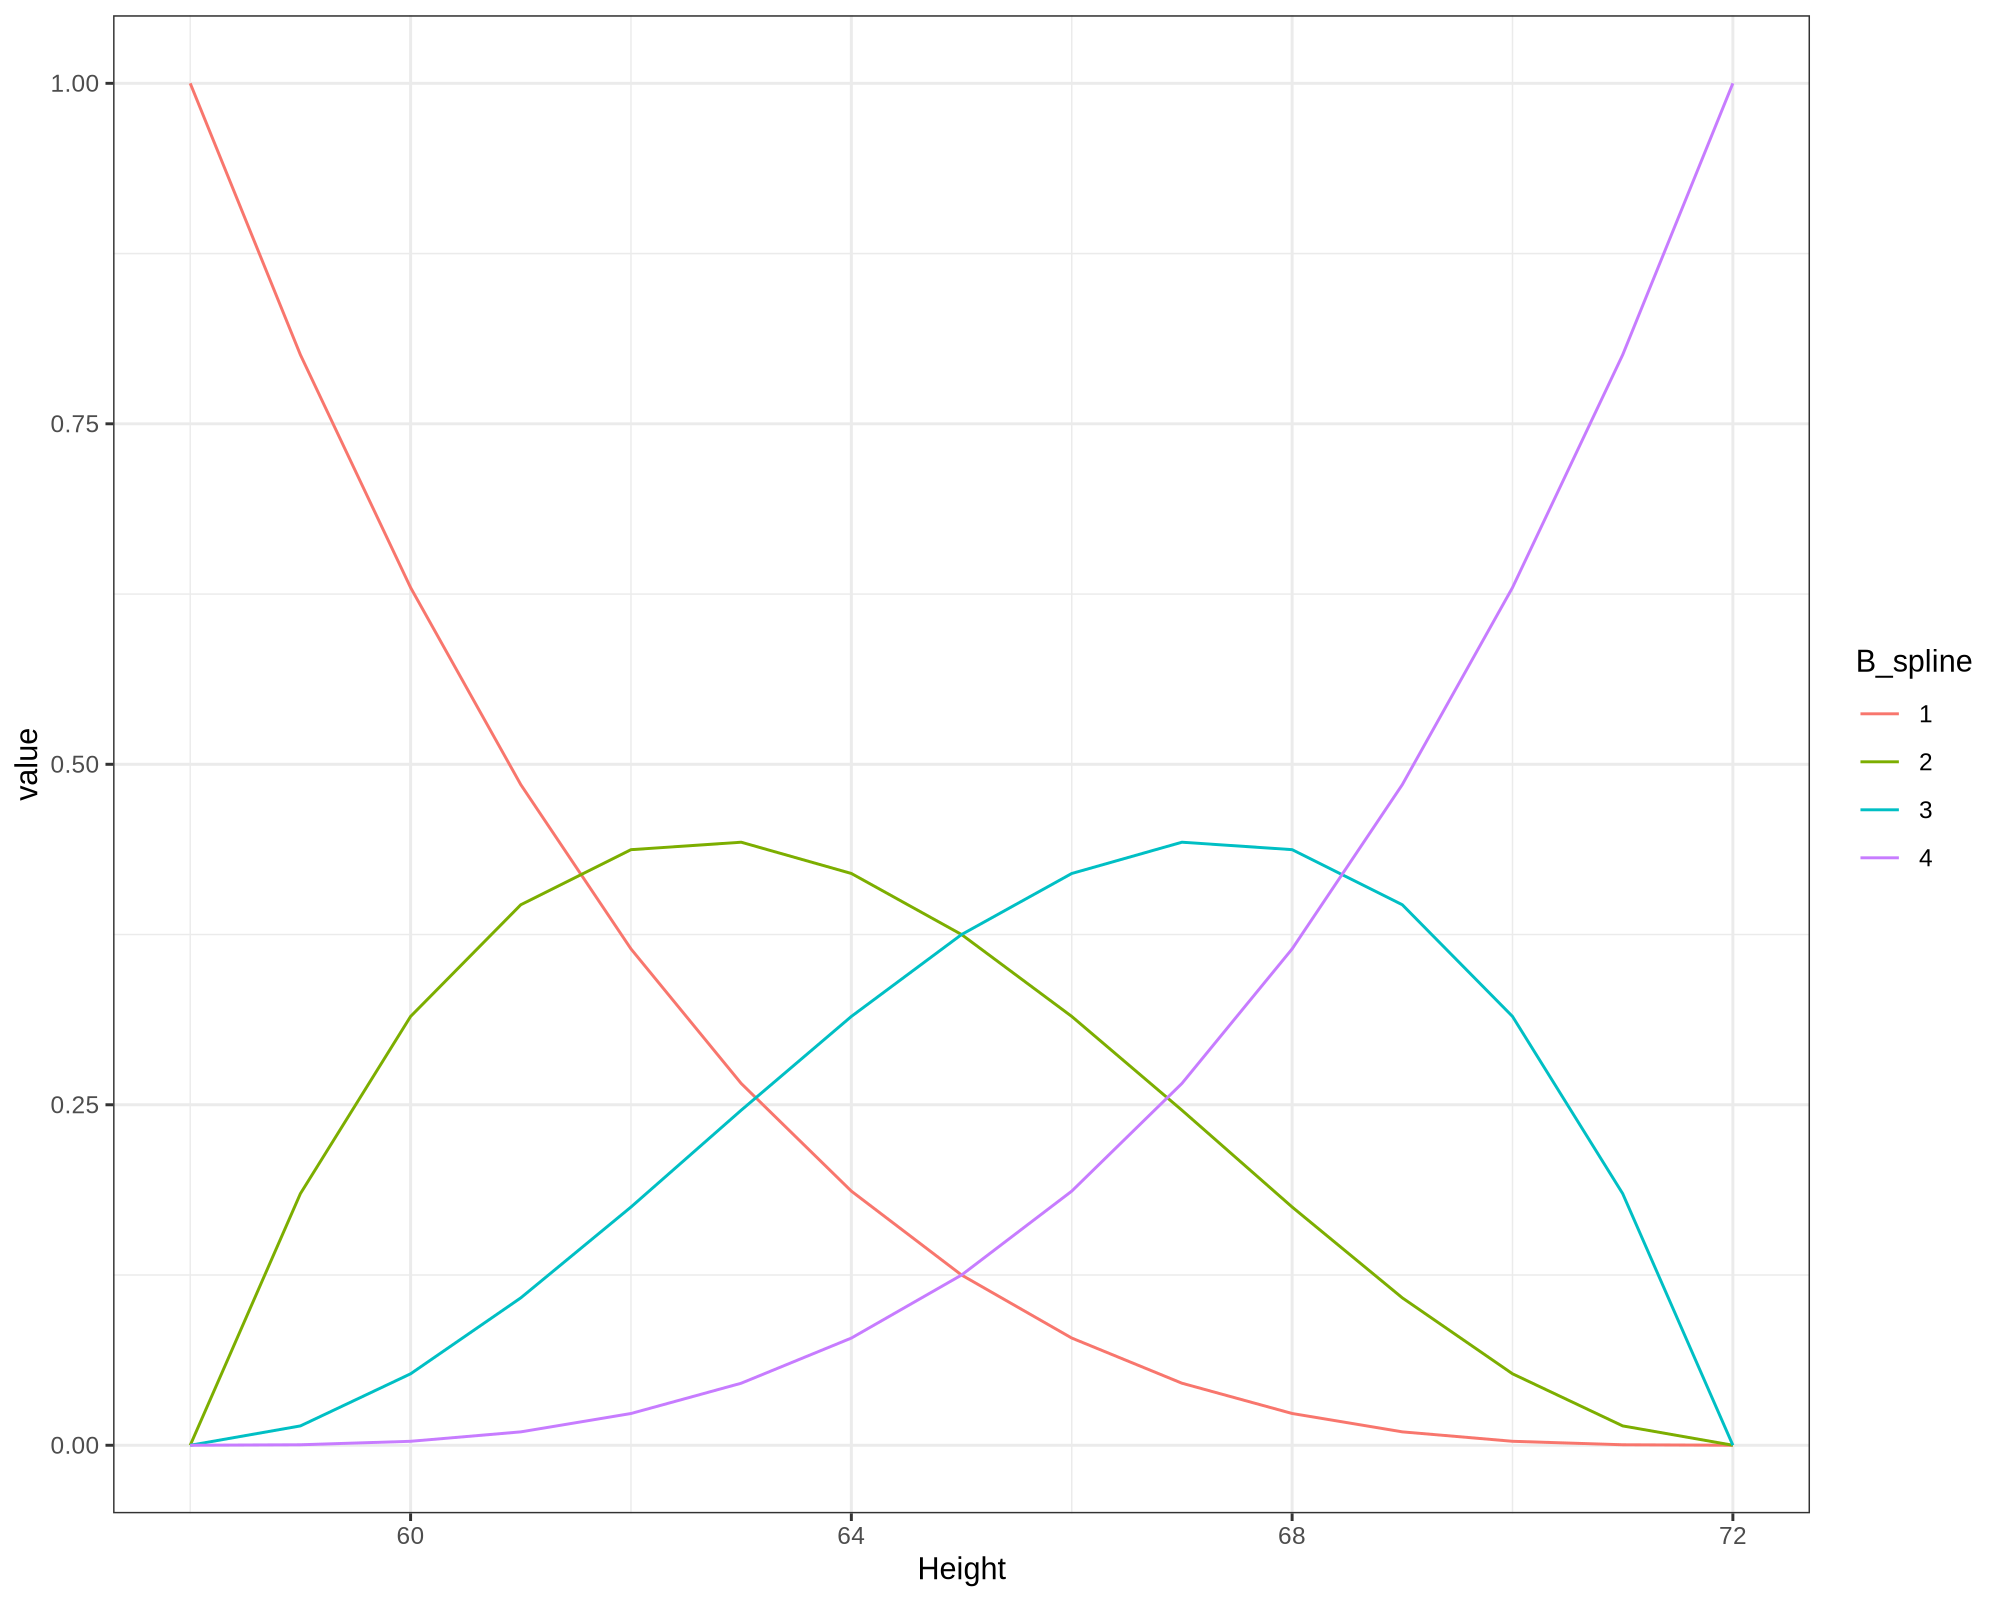

In [29]:
df <- bs(women$height, knots = 5) %>% as.data.frame()
df$Height <- women$height

df <- melt(df ,  id.vars = "Height", variable.name = "B_spline")

# plot on same grid, each series colored differently
ggplot(df, aes(Height, value)) + geom_line(aes(colour = B_spline)) + 
theme_bw()

In [30]:
summary(fm1 <- lm(weight ~ bs(height, df = 5), data = women))


Call:
lm(formula = weight ~ bs(height, df = 5), data = women)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31764 -0.13441  0.03922  0.11096  0.35086 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         114.8799     0.2167 530.146  < 2e-16 ***
bs(height, df = 5)1   3.4657     0.4595   7.543 3.53e-05 ***
bs(height, df = 5)2  13.0300     0.3965  32.860 1.10e-10 ***
bs(height, df = 5)3  27.6161     0.4571  60.415 4.70e-13 ***
bs(height, df = 5)4  40.8481     0.3866 105.669 3.09e-15 ***
bs(height, df = 5)5  49.1296     0.3090 158.979  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2276 on 9 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9998 
F-statistic: 1.298e+04 on 5 and 9 DF,  p-value: < 2.2e-16


In [31]:
attr(terms(fm1), "predvars")

list(weight, bs(height, degree = 3L, knots = c(62.6666666666667, 
67.3333333333333), Boundary.knots = c(58, 72), intercept = FALSE))

Warning message in bs(height, degree = 3L, knots = c(62.6666666666667, 67.3333333333333:
“some 'x' values beyond boundary knots may cause ill-conditioned bases”


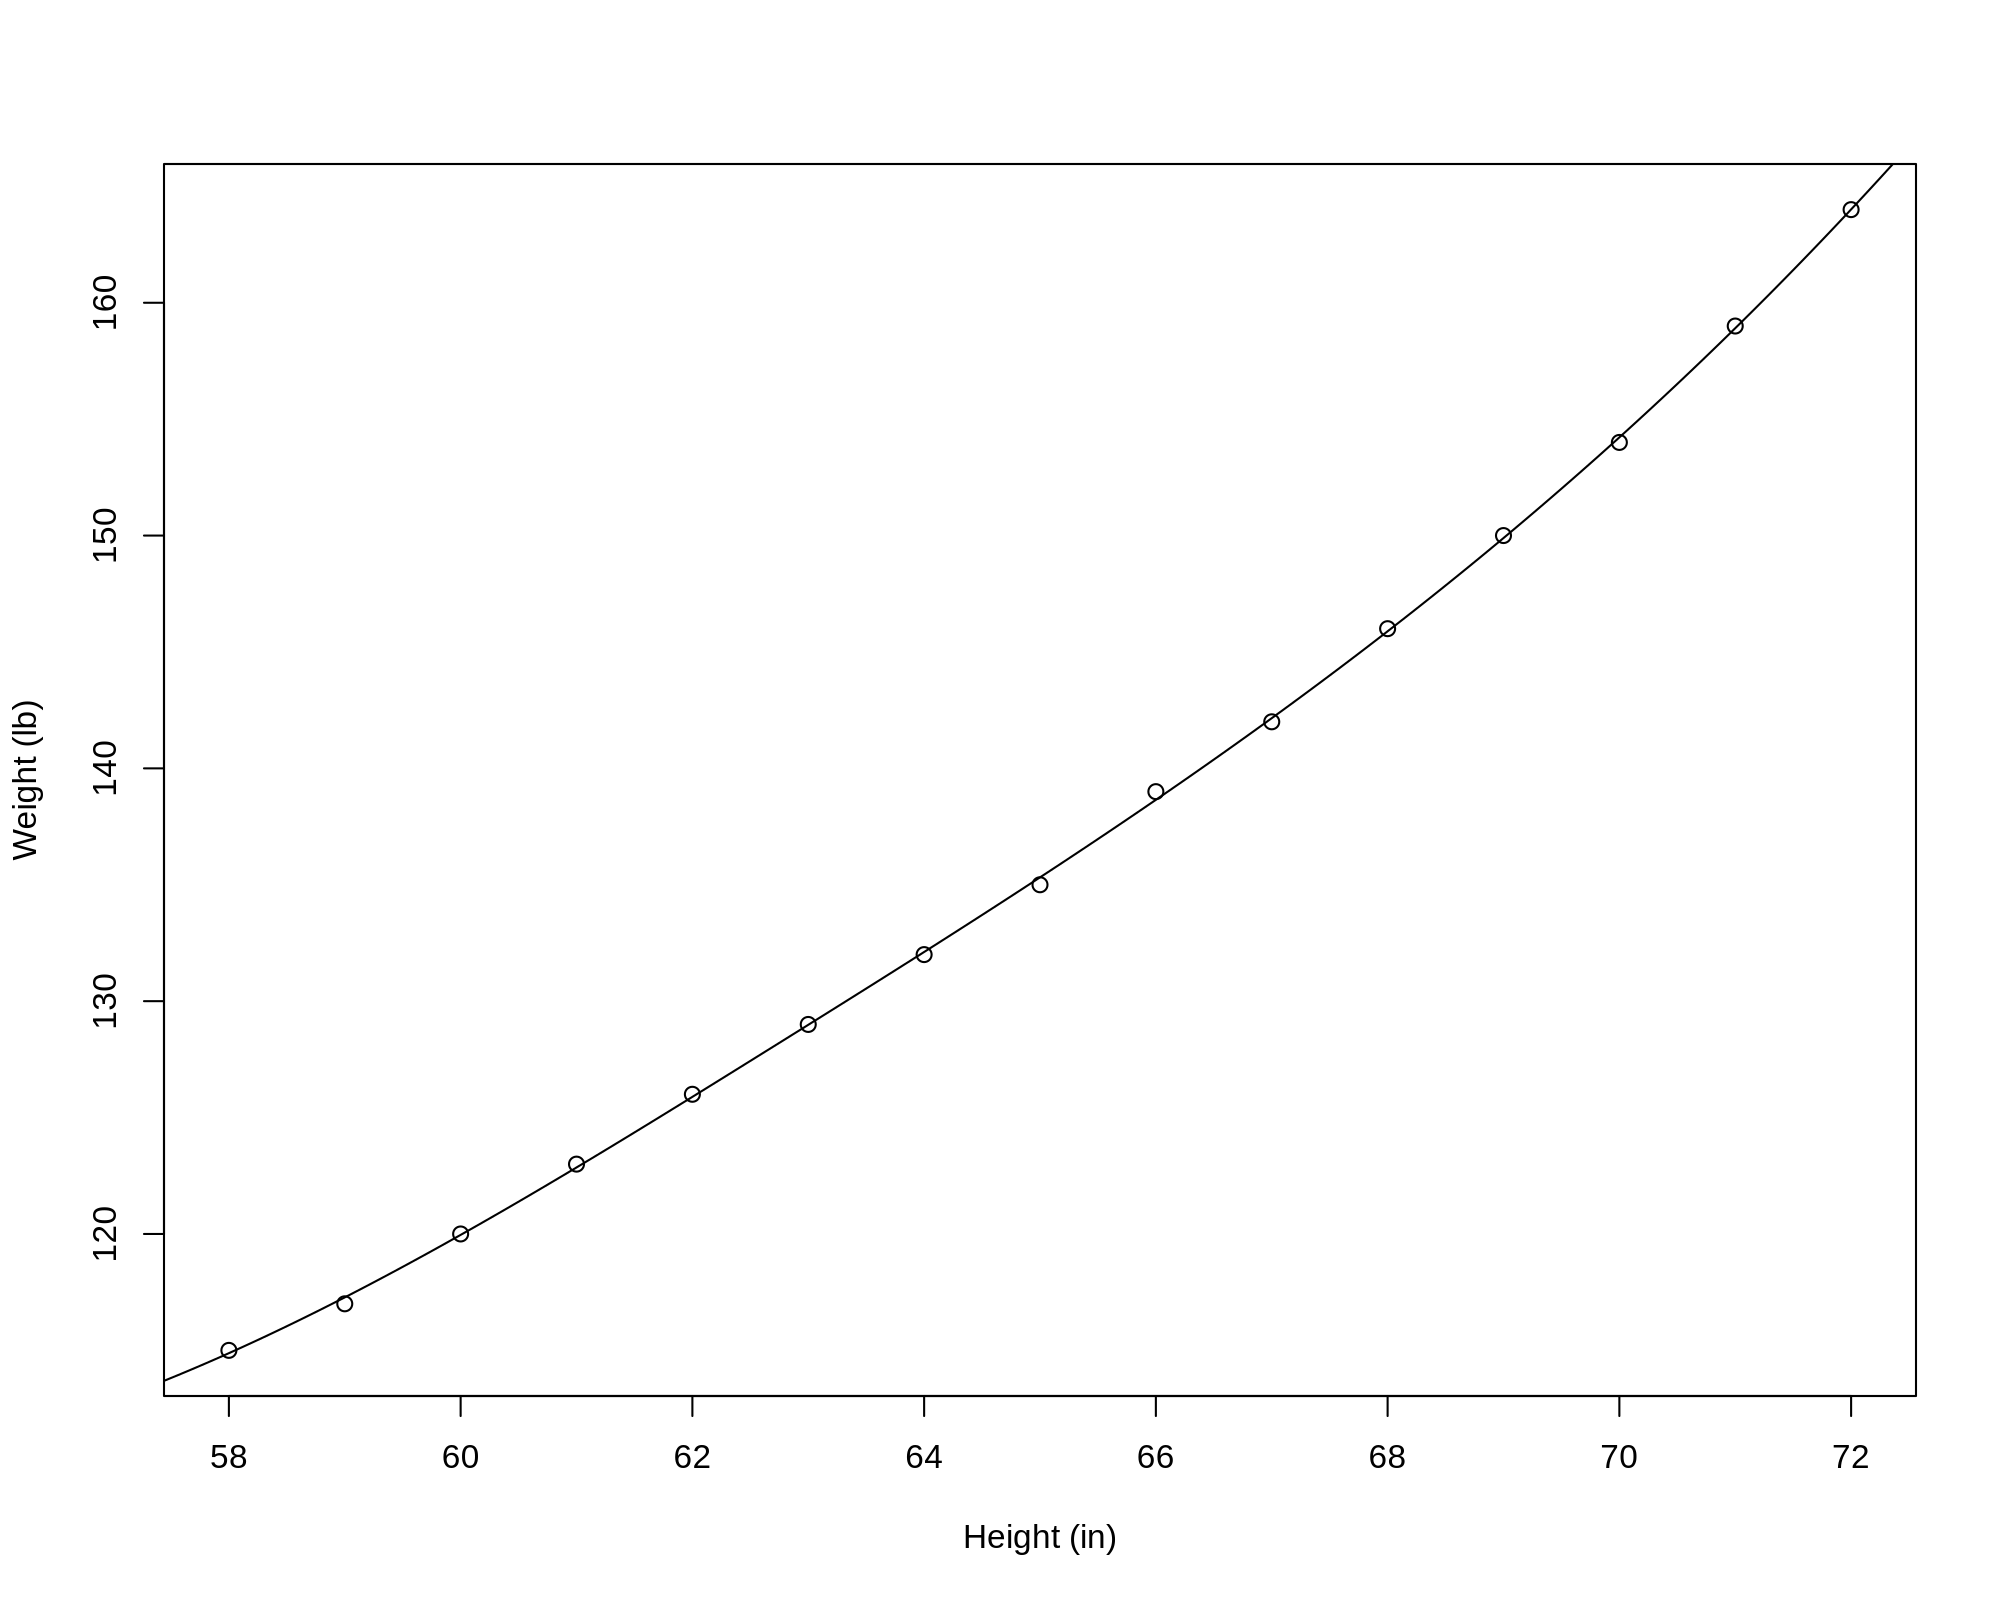

In [32]:
plot(women, xlab = "Height (in)", ylab = "Weight (lb)")

ht <- seq(57, 73, length.out = 200)
nD <- data.frame(height = ht)

lines(ht, p1 <- predict(fm1, nD))

In [34]:
stopifnot(all.equal(p1, predict(update(fm1, . ~ splines::bs(height, df=5)), nD)))

Warning message in splines::bs(height, degree = 3L, knots = c(62.6666666666667, :
“some 'x' values beyond boundary knots may cause ill-conditioned bases”


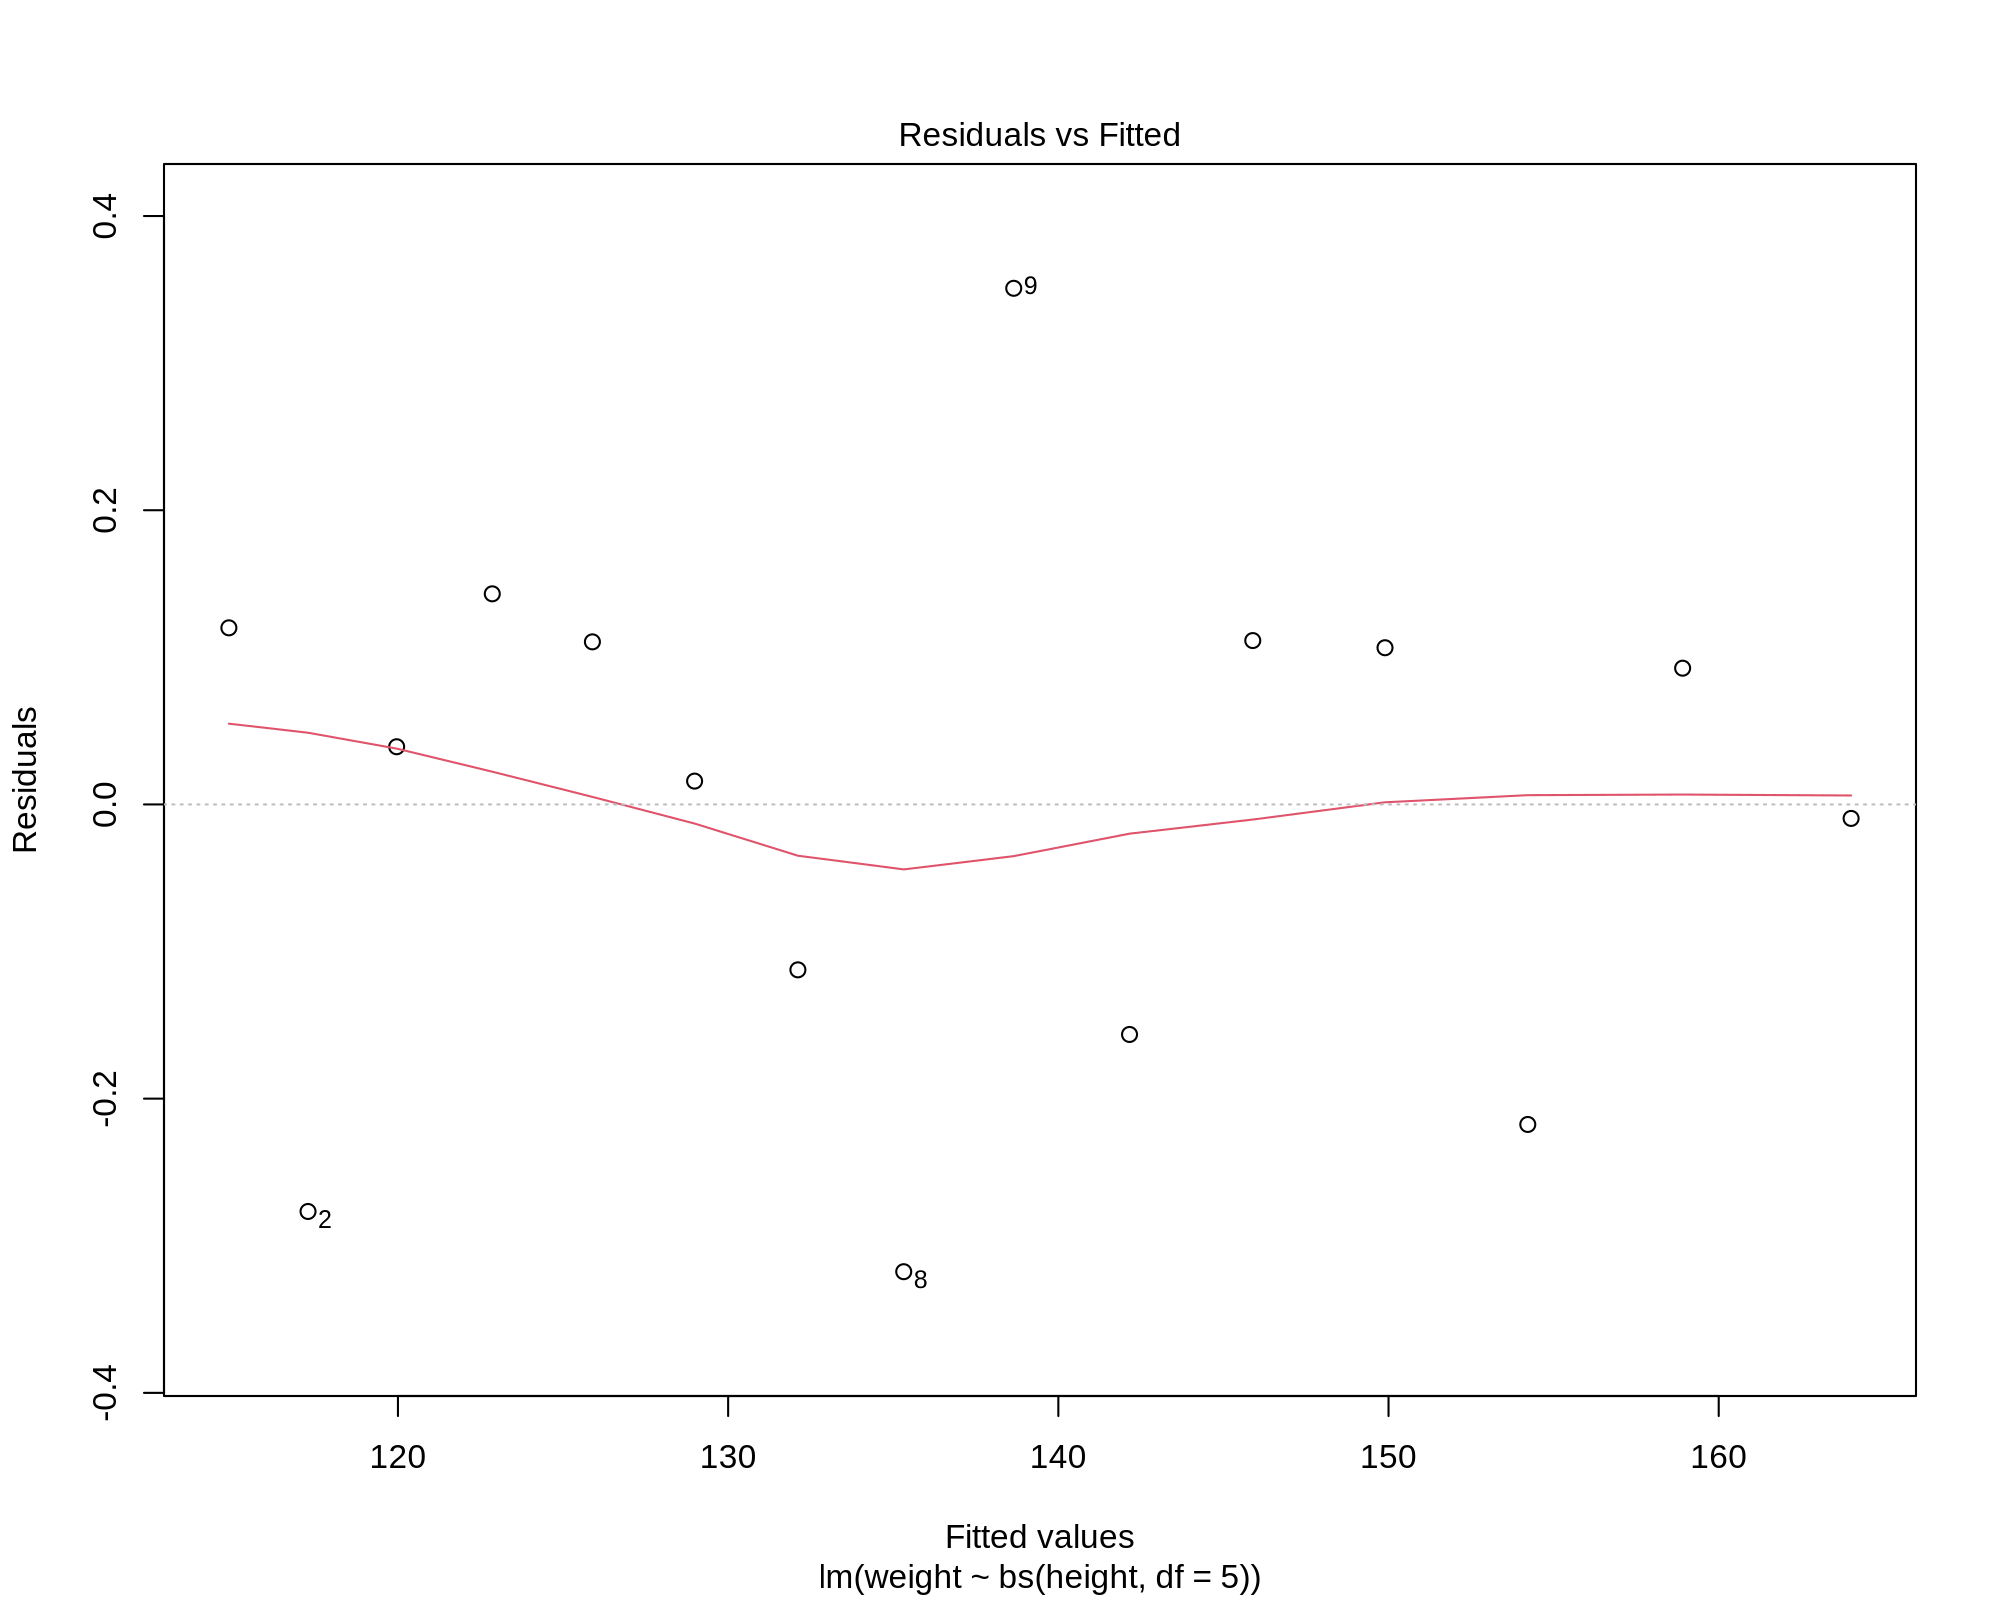

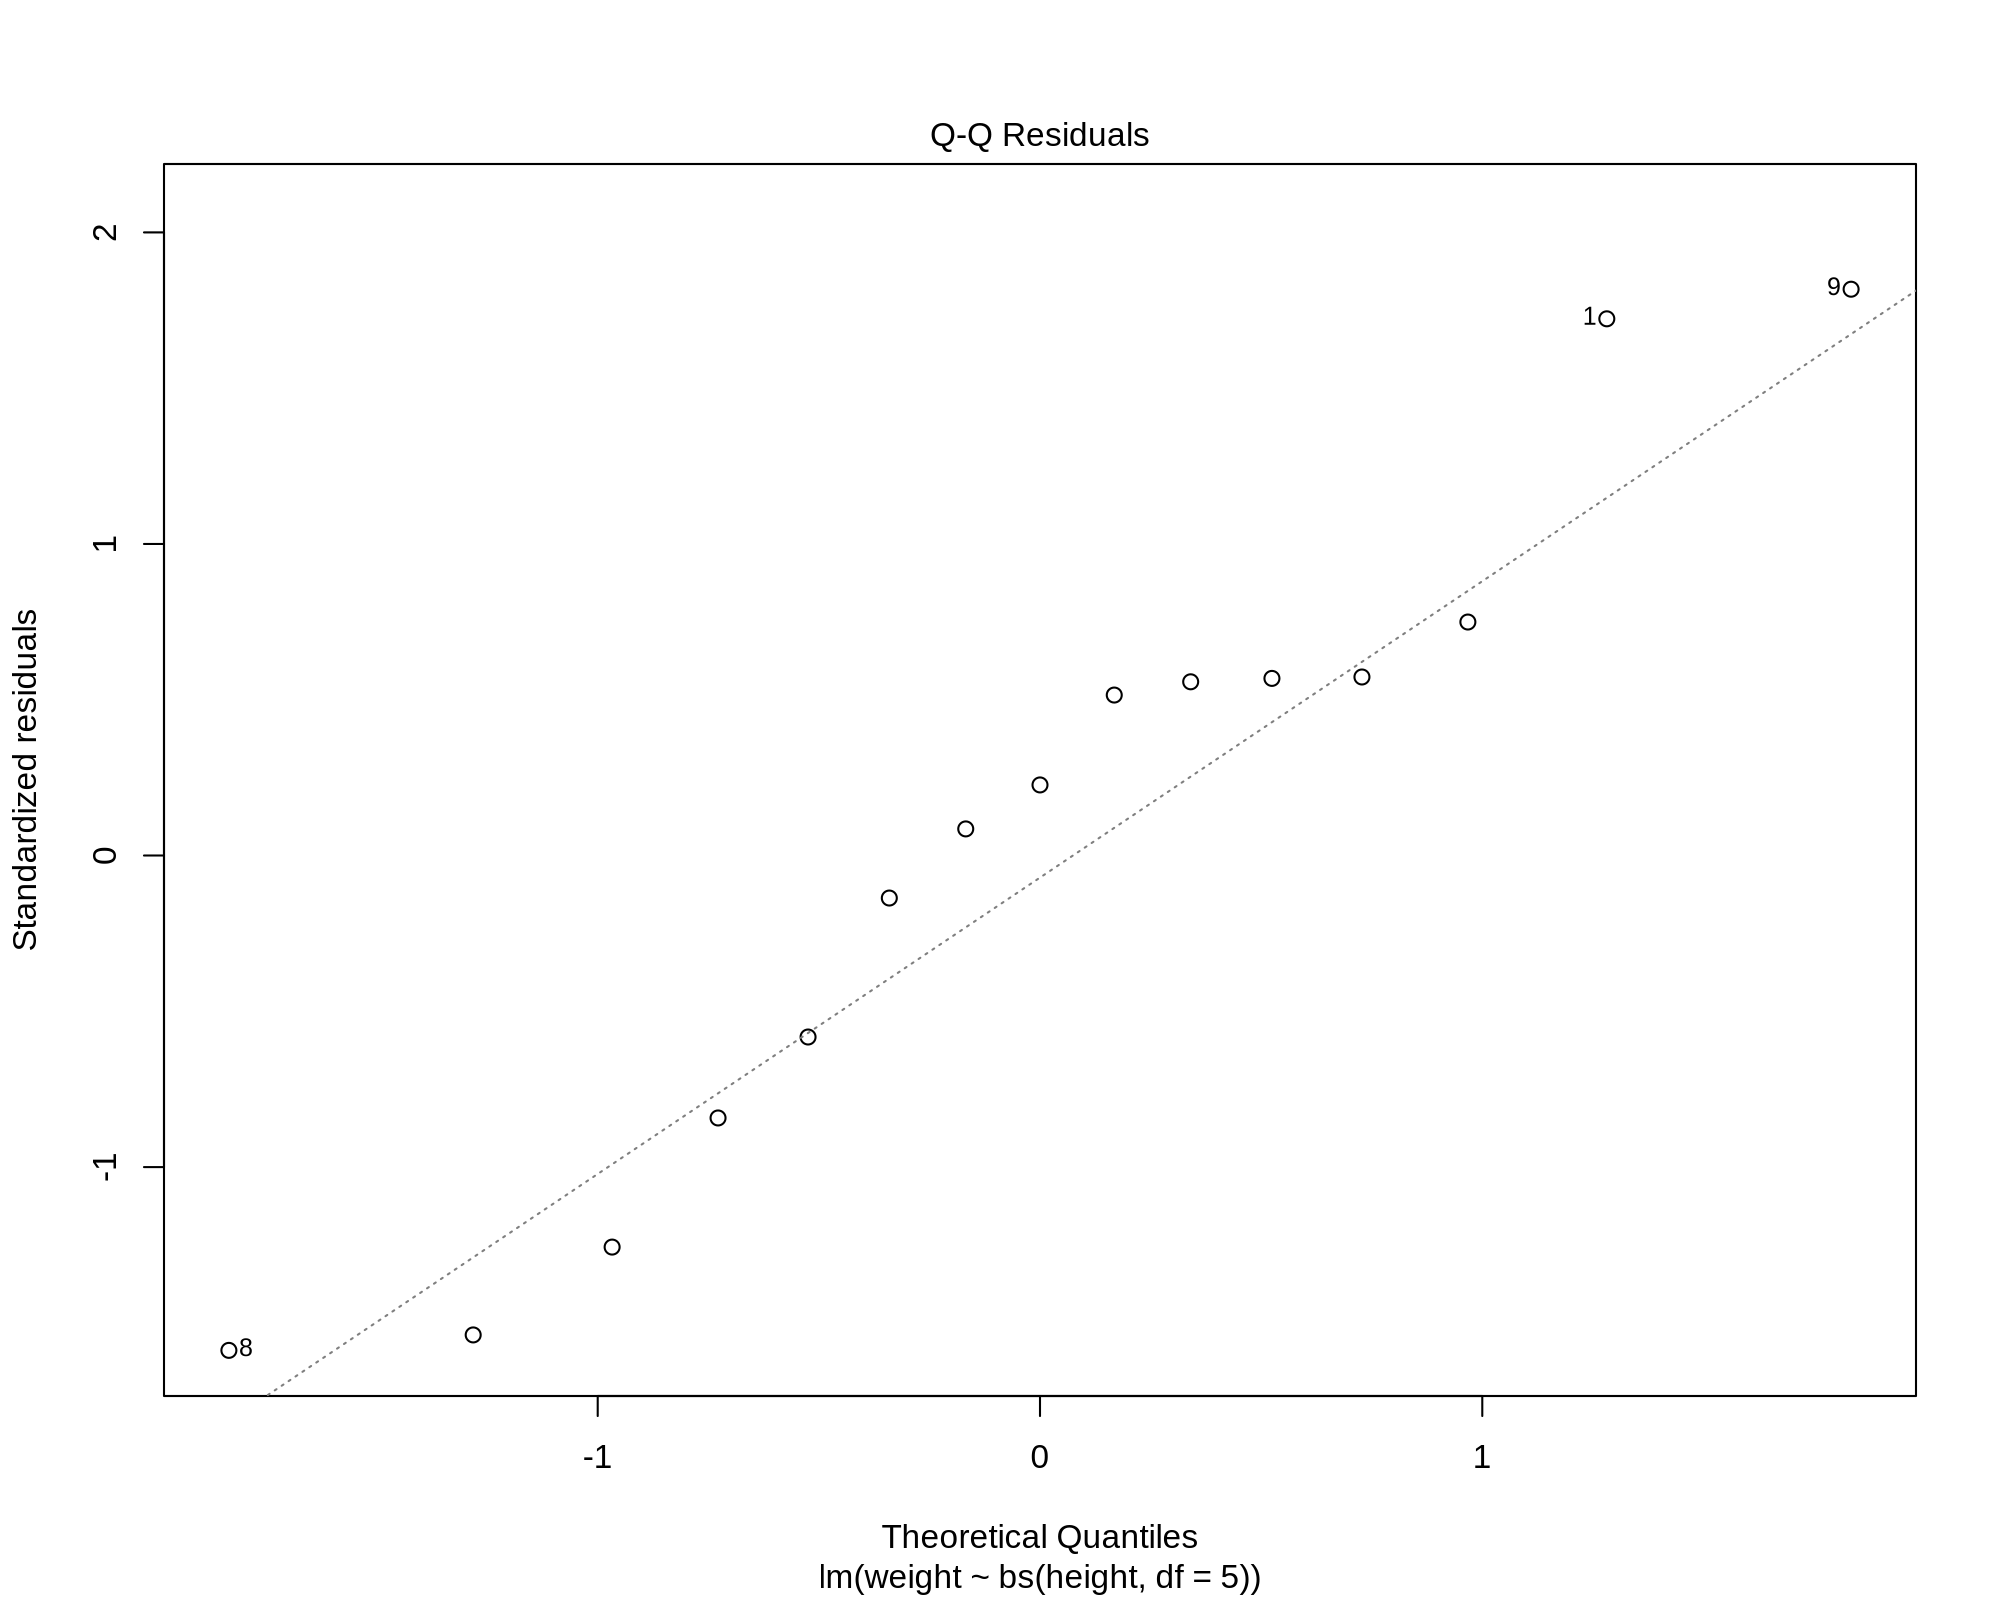

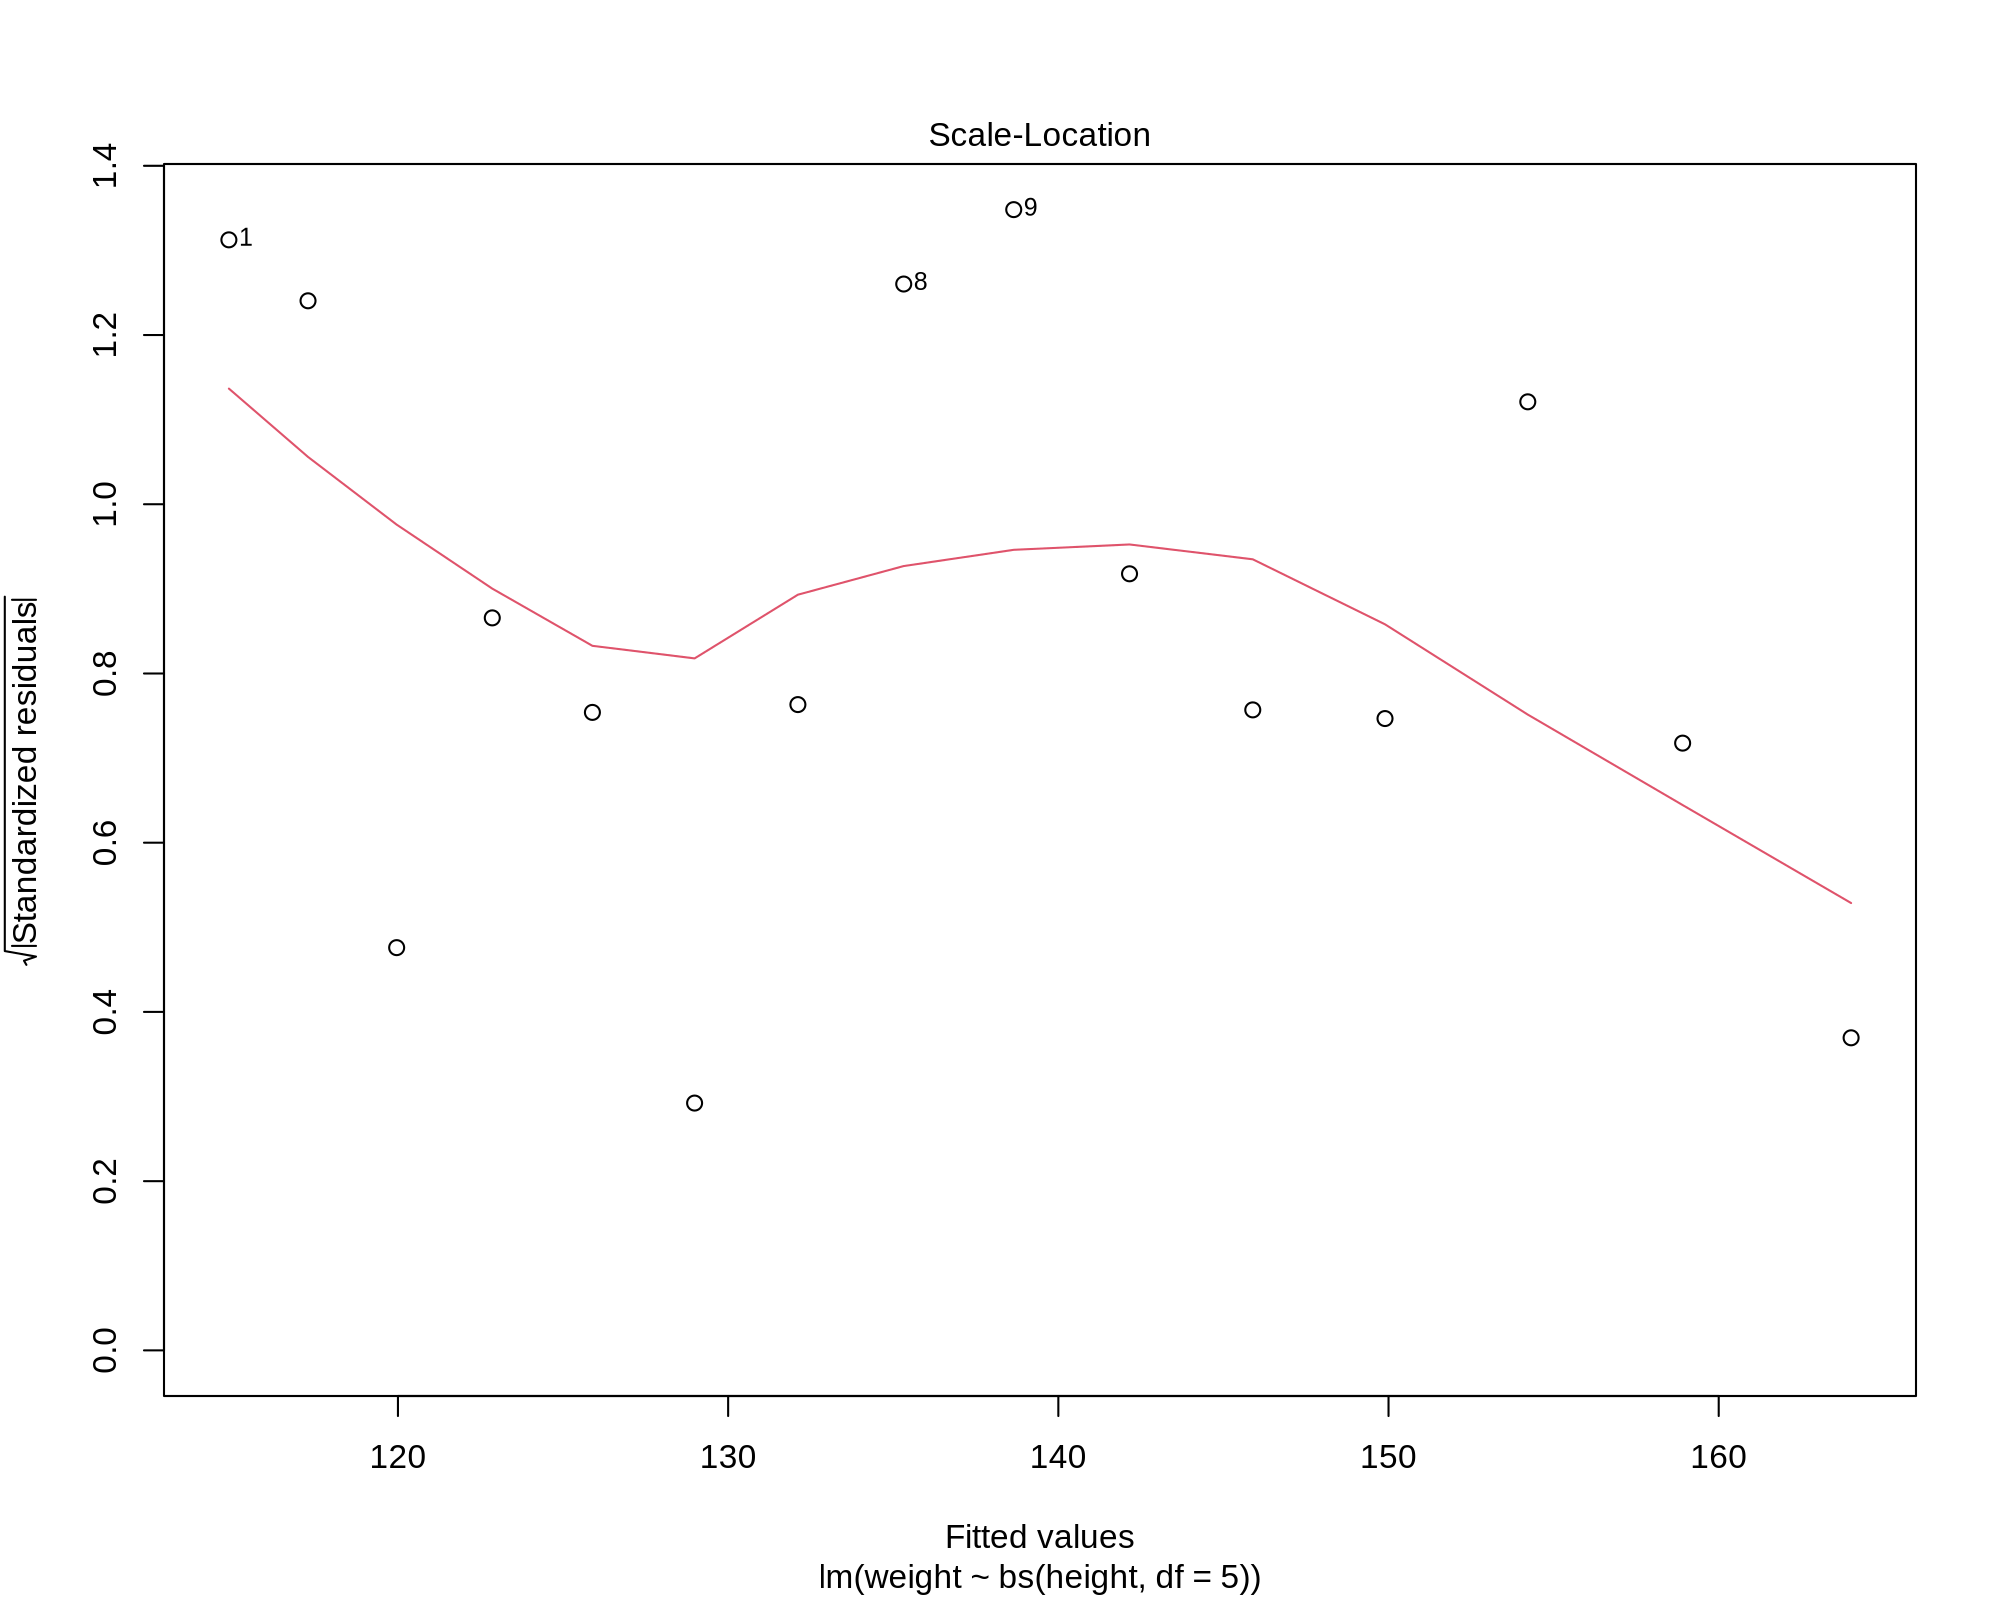

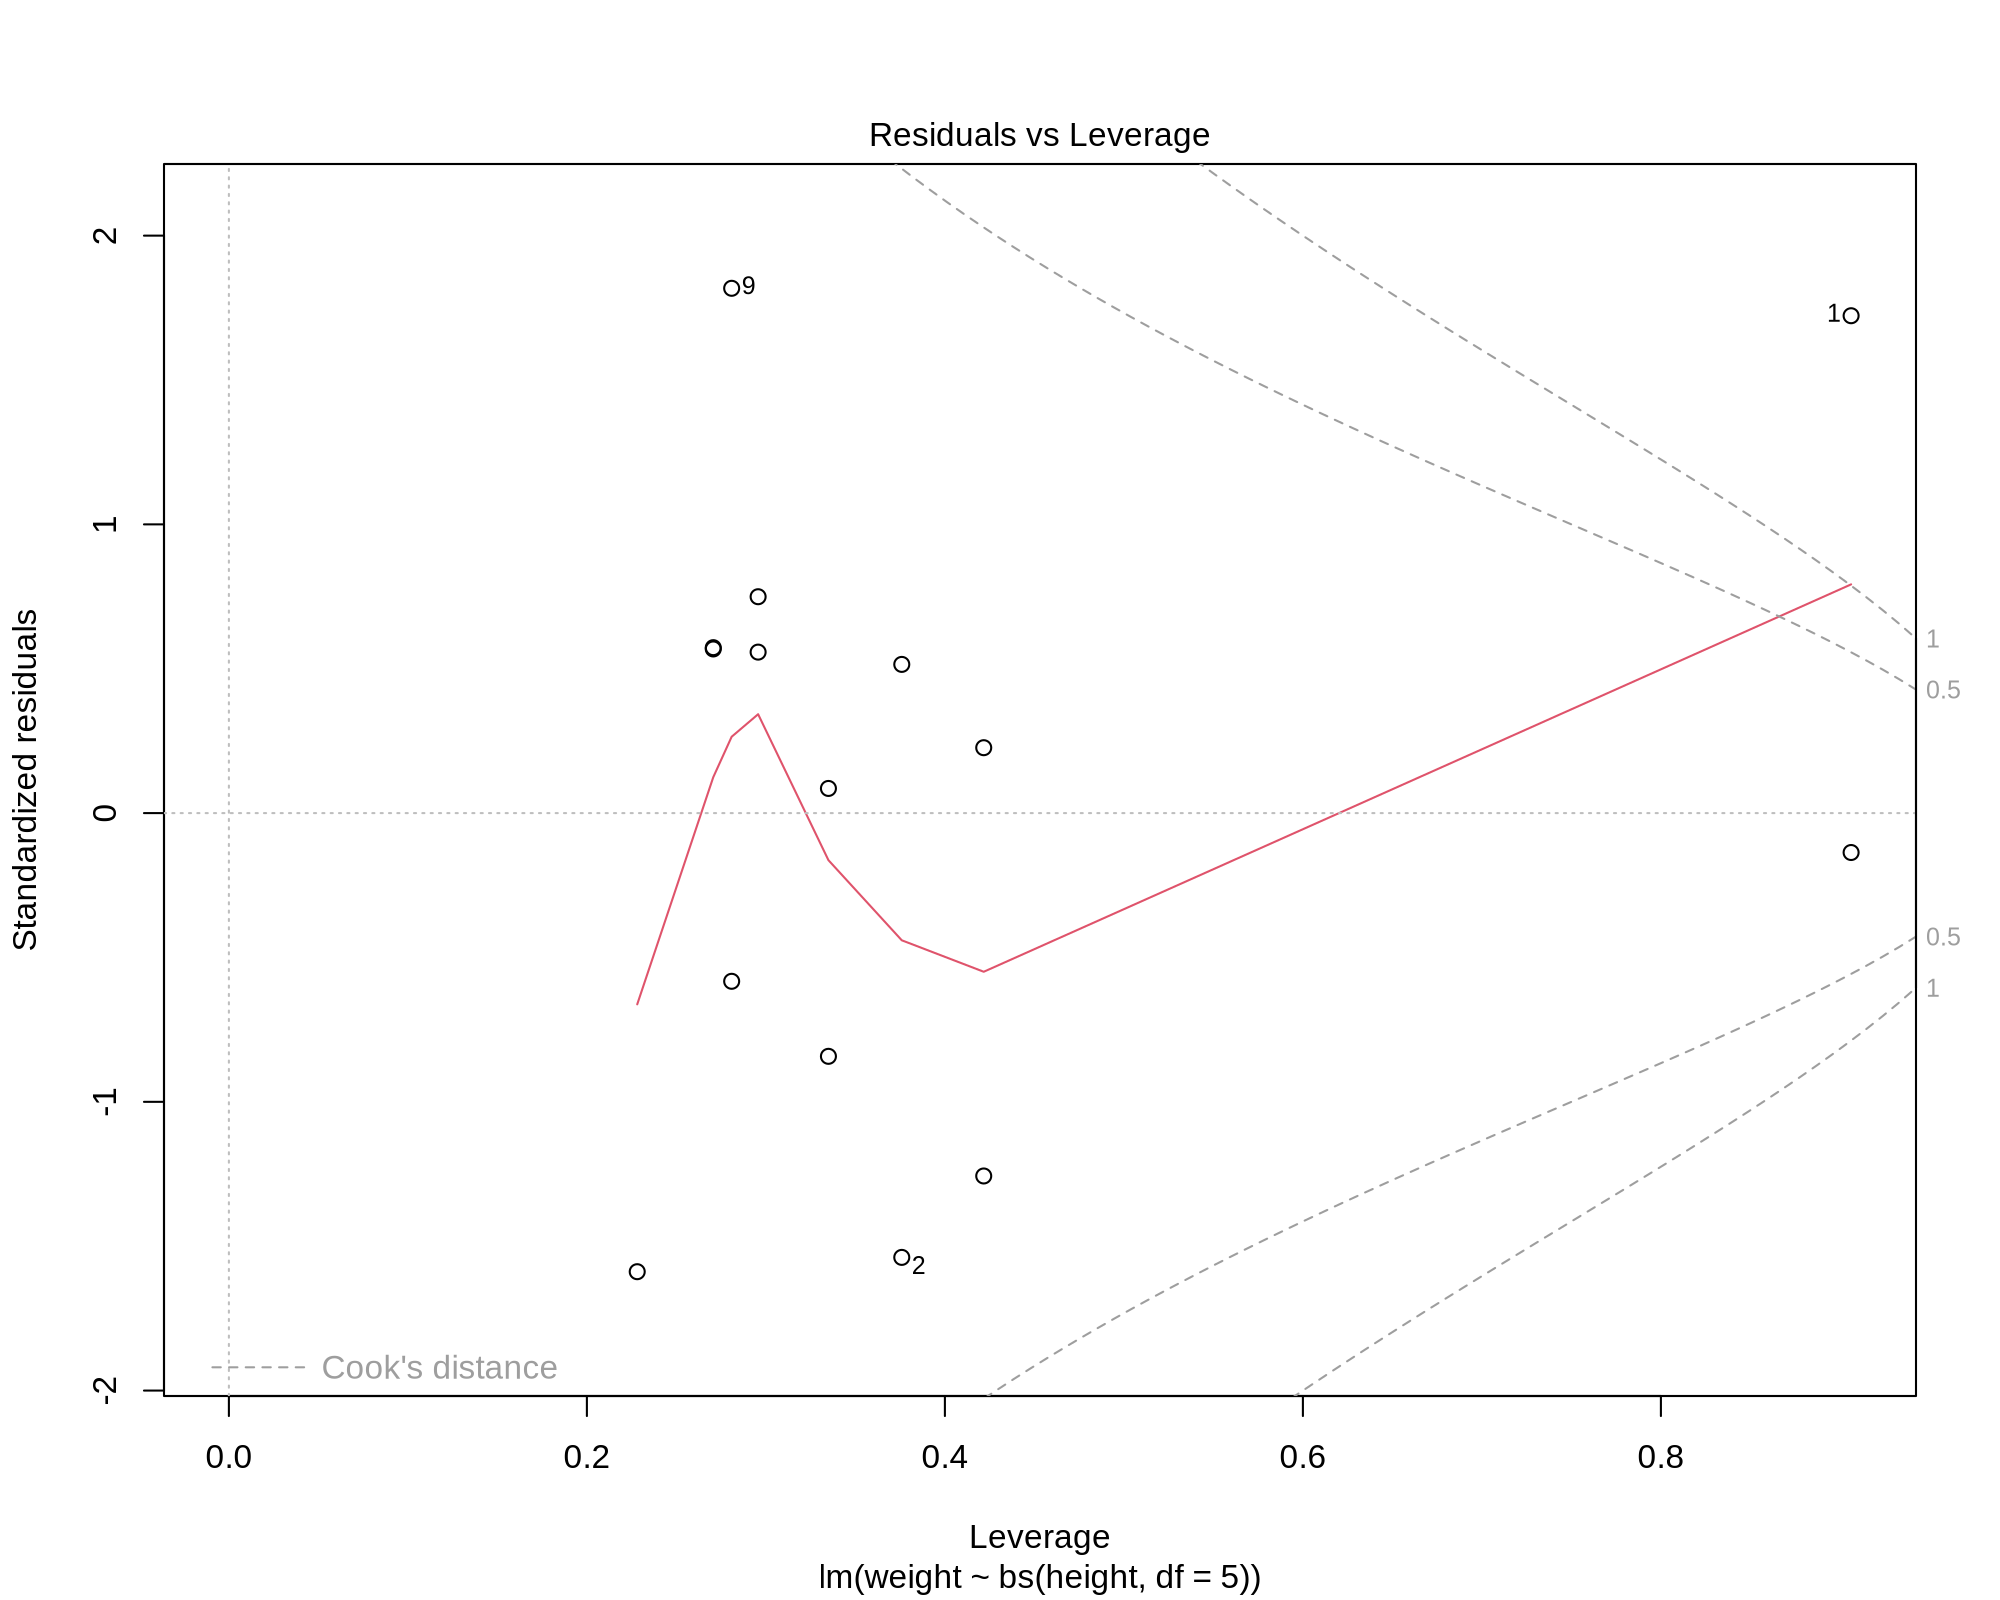

In [35]:
plot(fm1)